In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/HomeSaleData.csv", sep=";")

In [3]:
data

District             Neighborhood           Price Adrtisement Date  \
0             Tuzla              Aydınlı Mh.      165.000 TL       04.01.2020   
1             Fatih          Katip Kasım Mh.      207.000 TL       06.01.2020   
2          Çekmeköy            Çatalmeşe Mh.      153.000 TL       31.12.2019   
3          Çekmeköy   Mehmet Akif Ersoy Mah.      205.000 TL       29.12.2019   
4      Küçükçekmece       Halkalı Merkez Mh.      150.000 TL       01.01.2020   
...             ...                      ...             ...              ...   
34838       Sarıyer              Ayazağa Mh.    5.650.000 TL       02.01.2020   
34839      Bakırköy  Ataköy 2-5-6. Kısım Mh.   12.000.000 TL       03.01.2020   
34840       Sarıyer              Maslak Mah.    2.700.000 TL       03.01.2020   
34841         Fatih         İskenderpaşa Mh.      775.000 TL       28.12.2019   
34842    Beylikdüzü             Marmara Mah.    1.560.000 TL       04.01.2020   

       m² (Gross)  m² (Net) Number of rooms       Building Age Floor location  \
0              50      40.0             1+1       5-10 between              5   
1              42      42.0             1+1  31  and more than   Ground floor   
2              55      45.0             1+1                  1          Kot 1   
3              62      46.0             1+1                  0  High entrance   
4              70      55.0             1+1       5-10 between   Garden Floor   
...           ...       ...             ...                ...            ...   
34838         270     185.0             4+1                  0              9   
34839         289     250.0           4.5+1                  0              8   
34840         311     310.0             3+1                  1             14   
34841         145     121.0             3+1                  0              4   
34842         144     111.0             3+1                  0              5   

      Number of floors  ... Top floor Garage / Shop Top Entrance floor  \
0                   13  ...         0                 0              0   
1                    3  ...         0                 0              0   
2                    7  ...         0                 0              0   
3                    5  ...         0                 0              0   
4                    4  ...         0                 0              0   
...                ...  ...       ...               ...            ...   
34838                9  ...         0                 0              0   
34839               16  ...         0                 0              0   
34840               16  ...         1                 1              1   
34841                7  ...         0                 0              0   
34842                6  ...         1                 0              1   

      Floor Duplex Private Entry Rerse Duplex Triplex Ground floor  \
0                0             0            0       0            0   
1                0             0            0       0            0   
2                0             0            0       0            0   
3                0             0            0       0            0   
4                0             0            0       0            0   
...            ...           ...          ...     ...          ...   
34838            0             0            0       0            0   
34839            0             0            0       0            0   
34840            1             1            1       1            1   
34841            0             0            0       0            0   
34842            0             0            0       0            1   

       Roof Duplex  Pick Up Data Time  
0                0         01.08.2020  
1                0         01.10.2020  
2                0         01.10.2020  
3                0         01.10.2020  
4                0         01.07.2020  
...            ...                ...  
34838            0         01.08.2020  
34839          

In [4]:
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

m² (Net)    28
dtype: int64

In [5]:
data.shape

(34843, 179)

In [6]:
pd.set_option('max_info_columns', 2000)
pd.set_option('max_info_rows', 2000000)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34843 entries, 0 to 34842
Data columns (total 179 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    District                         34843 non-null  object 
 1    Neighborhood                     34843 non-null  object 
 2    Price                            34843 non-null  object 
 3    Adrtisement Date                 34843 non-null  object 
 4    m² (Gross)                       34843 non-null  int64  
 5    m² (Net)                         34815 non-null  float64
 6    Number of rooms                  34843 non-null  object 
 7    Building Age                     34843 non-null  object 
 8    Floor location                   34843 non-null  object 
 9    Number of floors                 34843 non-null  object 
 10   Heating                          34843 non-null  object 
 11   Number of bathrooms              34843 non-null  object 
 12   Ba

In [7]:
data.describe()

m² (Gross)      m² (Net)    Front West    Front East   Front South  \
count  34843.000000  34815.000000  34843.000000  34843.000000  34843.000000   
mean     127.141779    110.681258      0.268002      0.330052      0.554286   
std       79.674975     48.697697      0.442925      0.470238      0.497051   
min       20.000000     10.000000      0.000000      0.000000      0.000000   
25%       90.000000     80.000000      0.000000      0.000000      0.000000   
50%      110.000000    100.000000      0.000000      0.000000      1.000000   
75%      145.000000    130.000000      1.000000      1.000000      1.000000   
max     9140.000000    917.000000      1.000000      1.000000      1.000000   

        Front North          ADSL  Wood Joinery   Smart House  Alarm (Thief)  \
count  34843.000000  34843.000000  34843.000000  34843.000000   34843.000000   
mean       0.147289      0.329076      0.104985      0.064834       0.080045   
std        0.354399      0.469884      0.306539      0.246236       0.271366   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      1.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       ...        Garden     Top floor  Garage / Shop Top  Entrance floor  \
count  ...  34843.000000  34843.000000       34843.000000    34843.000000   
mean   ...      0.061791      0.066412           0.011365        0.050426   
std    ...      0.240780      0.249005           0.106002        0.218826   
min    ...      0.000000      0.000000           0.000000        0.000000   
25%    ...      0.000000      0.000000           0.000000        0.000000   
50%    ...      0.000000      0.000000           0.000000        0.000000   
75%    ...      0.000000      0.000000           0.000000        0.000000   
max    ...      1.000000      1.000000           1.000000        1.000000   

       Floor Duplex  Private Entry  Rerse Duplex       Triplex  Ground floor  \
count  34843.000000   34843.000000  34843.000000  34843.000000  34843.000000   
mean       0.028930       0.022185      0.023965      0.013173      0.019889   
std        0.167612       0.147288      0.152941      0.114018      0.139622   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        0.000000       0.000000      0.000000      0.000000      0.000000   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

        Roof Duplex  
count  34843.000000  
mean       0.098700  
std        0.298263  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 162 columns]

In [8]:
data.columns

Index(['District', 'Neighborhood', 'Price', 'Adrtisement Date', 'm² (Gross)',
       'm² (Net)', 'Number of rooms', 'Building Age', 'Floor location',
       'Number of floors',
       ...
       'Top floor', 'Garage / Shop Top', 'Entrance floor', 'Floor Duplex',
       'Private Entry', 'Rerse Duplex', 'Triplex', 'Ground floor',
       'Roof Duplex', 'Pick Up Data Time'],
      dtype='object', length=179)

In [9]:
data.columns = data.columns.str.replace(" ", "_")

In [10]:
for col in data:
    print(f"{col} \n", data[col].unique())
    print()

District 
 ['Tuzla' 'Fatih' 'Çekmeköy' 'Küçükçekmece' 'Ümraniye' 'Silivri' 'Esenyurt'
 'Arnavutköy' 'Avcılar' 'Eyüpsultan' 'Kağıthane' 'Ataşehir' 'Beylikdüzü'
 'Sancaktepe' 'Sultangazi' 'Üsküdar' 'Beşiktaş' 'Bayrampaşa' 'Beyoğlu'
 'Çatalca' 'Sarıyer' 'Başakşehir' 'Şişli' 'Gaziosmanpaşa' 'Şile'
 'Sultanbeyli' 'Esenler' 'Beykoz' 'Kartal' 'Zeytinburnu' 'Bakırköy'
 'Adalar' 'Bahçelievler' 'Güngören' 'Maltepe' 'Pendik' 'Kadıköy'
 'Büyükçekmece' 'Bağcılar']

Neighborhood 
 ['Aydınlı Mh.' 'Katip Kasım Mh.' 'Çatalmeşe Mh.' 'Mehmet Akif Ersoy Mah.'
 'Halkalı Merkez Mh.' 'Çakmak Mh.' 'Yeni Mah.' 'Yeşilkent Mh.'
 'Turgut Özal Mh.' 'Anadolu Mah.' 'Cihangir Mah.' 'Akşemsettin Mh.'
 'Gültepe Mh.' 'Hırka-i Şerif Mh.' 'Kemal Paşa Mh.' 'Esatpaşa Mh.'
 'Sultan Selim Mh.' 'Yakuplu Mah.' 'Sarıgazi Mh.' 'İsmetpaşa Mh.'
 'Aydıntepe Mh.' 'Kısıklı Mh.' 'Dikilitaş Mh.' 'İsmet Paşa Mh.'
 'Sururi Mehmet Efendi Mah.' 'Ferhatpaşa Mh.' 'Telsizler Mah.'
 'Yayla Mah.' 'İçerenköy Mh.' 'Yenidoğan Mh.' 'Fetihtepe Mah.'


# Data Cleaning & Feature Engineering

## District

In [11]:
data["District"] = data["District"].str.strip().str.title()

In [12]:
data["District"].unique()

array(['Tuzla', 'Fatih', 'Çekmeköy', 'Küçükçekmece', 'Ümraniye',
       'Silivri', 'Esenyurt', 'Arnavutköy', 'Avcılar', 'Eyüpsultan',
       'Kağıthane', 'Ataşehir', 'Beylikdüzü', 'Sancaktepe', 'Sultangazi',
       'Üsküdar', 'Beşiktaş', 'Bayrampaşa', 'Beyoğlu', 'Çatalca',
       'Sarıyer', 'Başakşehir', 'Şişli', 'Gaziosmanpaşa', 'Şile',
       'Sultanbeyli', 'Esenler', 'Beykoz', 'Kartal', 'Zeytinburnu',
       'Bakırköy', 'Adalar', 'Bahçelievler', 'Güngören', 'Maltepe',
       'Pendik', 'Kadıköy', 'Büyükçekmece', 'Bağcılar'], dtype=object)

## Neighborhood

In [13]:
data["Neighborhood"] = data["Neighborhood"].str.strip().str.title()
data['Neighborhood'] = data['Neighborhood'].str.replace(r'Mh\.', 'Mah.', regex=True)

In [14]:
data["Neighborhood"].unique()

array(['Aydınlı Mah.', 'Katip Kasım Mah.', 'Çatalmeşe Mah.',
       'Mehmet Akif Ersoy Mah.', 'Halkalı Merkez Mah.', 'Çakmak Mah.',
       'Yeni Mah.', 'Yeşilkent Mah.', 'Turgut Özal Mah.', 'Anadolu Mah.',
       'Cihangir Mah.', 'Akşemsettin Mah.', 'Gültepe Mah.',
       'Hırka-I Şerif Mah.', 'Kemal Paşa Mah.', 'Esatpaşa Mah.',
       'Sultan Selim Mah.', 'Yakuplu Mah.', 'Sarıgazi Mah.',
       'İsmetpaşa Mah.', 'Aydıntepe Mah.', 'Kısıklı Mah.',
       'Dikilitaş Mah.', 'İsmet Paşa Mah.', 'Sururi Mehmet Efendi Mah.',
       'Ferhatpaşa Mah.', 'Telsizler Mah.', 'Yayla Mah.',
       'İçerenköy Mah.', 'Yenidoğan Mah.', 'Fetihtepe Mah.',
       'Sultaniye Mah.', 'Pınar Mah.', 'Kayabaşı Mah.', 'Madenler Mah.',
       'Fatih Silivri Mah.', 'İslambey Mah.', 'Aziz Mahmut Hüdayi Mah.',
       'Eskişehir Mah.', 'Karlıtepe Mah.', 'Emirgan Mah.',
       'Parseller Mah.', 'Balibey Mah.', 'Akçaburgaz Mah.',
       'Mimar Sinan Mah.', 'Barbaros Hayrettin Paşa Mah.',
       'Esentepe Mah.', 'Silivrik

## Price

In [15]:
data["Price"] = data["Price"].str.replace(r'\s*TL', '', regex=True)
data["Price"] = data["Price"].str.replace(r'\.', '', regex=True)
data["Price"] = data["Price"].str.replace(',', '.', regex=True)
data["Price"] = data["Price"].astype(float)

data.rename(columns={'Price': 'Price_(TL)'}, inplace=True)

In [16]:
data['Price_(TL)'].unique().dtype

dtype('float64')

<Axes: ylabel='Price_(TL)'>

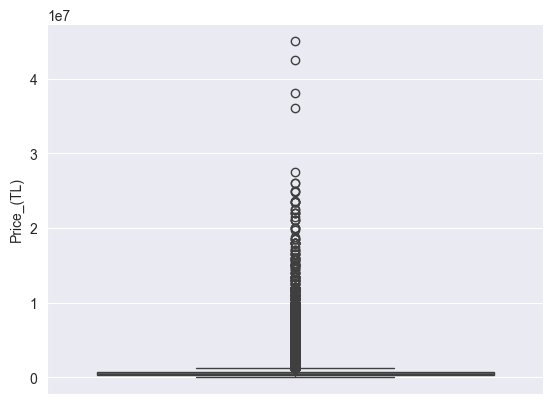

In [17]:
sns.boxplot(y="Price_(TL)", data=data)

In [18]:
filtered_price = data[data["Price_(TL)"] >= 30000000].sort_values(by="Price_(TL)", ascending=False)
print(filtered_price)

       District    Neighborhood  Price_(TL) Adrtisement_Date  m²_(Gross)  \
9772    Beyoğlu  Gümüşsuyu Mah.  45000000.0       14.12.2019         400   
34467   Sarıyer    Yeniköy Mah.  42500000.0       28.12.2019         400   
9280   Beşiktaş      Bebek Mah.  38000000.0       29.12.2019         220   
12213  Beşiktaş       Ulus Mah.  36000000.0       06.01.2020         220   

       m²_(Net) Number_of_rooms       Building_Age  Floor_location  \
9772      400.0            10+1  31  and more than               4   
34467     380.0             5+1  31  and more than               4   
9280      200.0             4+1      26-30 between  Entrance floor   
12213     200.0             3+1      21-25 between       Penthouse   

      Number_of_floors  ... Top_floor Garage_/_Shop_Top Entrance_floor  \
9772                 4  ...         0                 0              0   
34467                4  ...         1                 0              0   
9280                 3  ...         0         

In [19]:
filtered_price = data[data["Neighborhood"] == "Gümüşsuyu Mah."].sort_values(by="Price_(TL)", ascending=False)
print(filtered_price.head(20))

      District    Neighborhood  Price_(TL) Adrtisement_Date  m²_(Gross)  \
9772   Beyoğlu  Gümüşsuyu Mah.  45000000.0       14.12.2019         400   
24835  Beyoğlu  Gümüşsuyu Mah.  18500000.0       15.12.2019         280   
9574   Beyoğlu  Gümüşsuyu Mah.  17000000.0       14.12.2019         280   
19462  Beyoğlu  Gümüşsuyu Mah.  12000000.0       26.12.2019         240   
29005  Beyoğlu  Gümüşsuyu Mah.   5500000.0       15.12.2019         195   
33988  Beyoğlu  Gümüşsuyu Mah.   5400000.0       05.01.2020         139   
12152  Beyoğlu  Gümüşsuyu Mah.   5300000.0       06.01.2020         165   
12140  Beyoğlu  Gümüşsuyu Mah.   3150000.0       02.01.2020         160   
30043  Beyoğlu  Gümüşsuyu Mah.   3150000.0       02.01.2020         150   
29301  Beyoğlu  Gümüşsuyu Mah.   3150000.0       14.12.2019         150   
8610   Beyoğlu  Gümüşsuyu Mah.   2950000.0       04.01.2020         190   
15378  Beyoğlu  Gümüşsuyu Mah.   2500000.0       15.12.2019         170   
4414   Beyoğlu  Gümüşsuyu

In [20]:
data = data.drop(index=[34467, 9280, 12213])

<Axes: ylabel='Price_(TL)'>

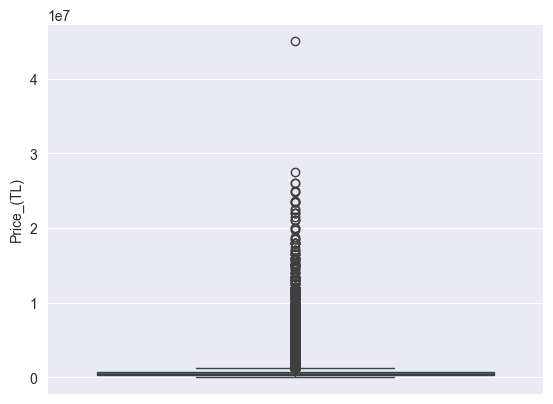

In [21]:
sns.boxplot(y="Price_(TL)", data=data)

In [22]:
# 10+1
filtered_data = data[data["Number_of_rooms"] == "10 and more than"]
print(filtered_data)

         District      Neighborhood  Price_(TL) Adrtisement_Date  m²_(Gross)  \
4202     Bağcılar  Yenimahalle Mah.    600000.0       31.12.2019         240   
4384   Arnavutköy     İslambey Mah.   1450000.0       24.12.2019         480   
24867     Kadıköy   Fenerbahçe Mah.  10000000.0       02.01.2020         840   
30273  Arnavutköy      Anadolu Mah.   1120000.0       24.12.2019         450   
34085      Kartal   Kordonboyu Mah.  14760000.0       02.01.2020         917   

       m²_(Net)   Number_of_rooms   Building_Age     Floor_location  \
4202      200.0  10 and more than  11-15 between                  3   
4384      445.0  10 and more than              0                  4   
24867     580.0  10 and more than              0                 10   
30273     400.0  10 and more than              0                  5   
34085     917.0  10 and more than              0  30  and more than   

        Number_of_floors  ... Top_floor Garage_/_Shop_Top Entrance_floor  \
4202            

In [23]:
data = data.drop(index=[9772])

<Axes: ylabel='Price_(TL)'>

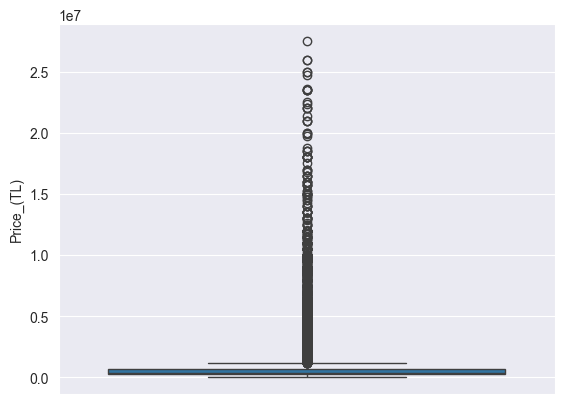

In [24]:
sns.boxplot(y="Price_(TL)", data=data)

## Adrtisement Date

In [25]:
data.drop(columns=["Adrtisement_Date"], inplace=True)

## m² (Gross)

In [26]:
data.rename(columns={"m²_(Gross)": "m2_(Gross)"}, inplace=True)

In [27]:
data["m2_(Gross)"] = pd.to_numeric(data["m2_(Gross)"], errors="coerce")

In [28]:
data["m2_(Gross)"].unique()

array([  50,   42,   55,   62,   70,   65,   75,   64,   69,   72,   95,
         67,   80,   90,   85,   96,   82,  100,   92,   83,  102,   87,
         86,  105,  110,  115,  116,  130,  120,  126,  117,  125,  135,
        140,  134,  145,  138,  155,  180,  200,  220,  217,   66,   99,
        127,  187,   77,   97,  210,  190,   68,  150,   60,   78,  245,
        143,  160,  129,  152,   43,   89,   61,  101,  165,   20,   40,
         45,   54,   58,   71,  103,   74,   84,   88,  114,   98,  123,
        106,  133,  124,  139,  118,  121,  151,  112,  148,  128,  154,
        174,  164,  172,  146,  137,  173,  170,  177,  162,  186,  169,
        208,  232,  156,  240,  159,  175,  192,  183,  185,  196,  184,
        189,  230,  225,  235,  246,  320,  285,  260,  209,  215,  250,
        265,  254,  300,  280,  270,  290,  330,  389,  500,  108,   37,
         32,   48,   30,   56,   35,   57,   38,   59,   52,   51,   49,
         76,   53,   73,   63,   93,   81,  132,   

In [29]:
data["m2_(Gross)"].dtype

dtype('int64')

In [30]:
data[data["m2_(Gross)"] >= 1000]

District      Neighborhood  Price_(TL)  m2_(Gross)  m²_(Net)  \
2867        Esenler   Nine Hatun Mah.    180000.0        1100     100.0   
3318        Silivri         Yeni Mah.    329000.0        1300     115.0   
4012    Zeytinburnu     Nuripaşa Mah.    450000.0        1700     160.0   
5577     Arnavutköy      Anadolu Mah.    251000.0        1000      95.0   
5881       Esenyurt     Gökevler Mah.    330000.0        1200     110.0   
8716       Ataşehir    Kayışdağı Mah.    375000.0        1000      80.0   
10886        Pendik     Kaynarca Mah.    570000.0        2000     175.0   
12503  Büyükçekmece    Pınartepe Mah.   1380000.0        9140     370.0   
13962       Kadıköy     Osmanağa Mah.    500000.0        1100     110.0   
20813      Beşiktaş         Akat Mah.     22222.0        2222      22.0   
24825      Beşiktaş         Ulus Mah.   5800000.0        2220     200.0   
26111       Sarıyer  Darüşşafaka Mah.    975000.0        1500     140.0   
27328   Sultanbeyli         Adil Mah.    350000.0        1160     150.0   
27459       Beyoğlu        Çukur Mah.    340000.0        1009      95.0   
28380        Beykoz      Acarlar Mah.  21000000.0        1500     500.0   
31737        Pendik       Çamlık Mah.    490000.0        2400     200.0   

      Number_of_rooms       Building_Age Floor_location Number_of_floors  \
2867              3+1      21-25 between              6                6   
3318              3+1       5-10 between  High entrance                6   
4012              2+2      21-25 between              4                5   
5577              2+1                  0              1                5   
5881              2+1                  0              1                7   
8716              2+1                  0              9               11   
10886             4+2      11-15 between              5                6   
12503             5+1                  4          Kot 4                4   
13962             3+1  31  and more than              2                5   
20813           1.5+1                  3          Kot 3                2   
24825             4+1      11-15 between              3                4   
26111             3+1      16-20 between              3                5   
27328             4+1                  0              4                4   
27459             1+1      21-25 between              1                5   
28380             6+2       5-10 between     Villa type                3   
31737             6+1                  0              8                9   

                    Heating  ... Top_floor Garage_/_Shop_Top Entrance_floor  \
2867    Natural Gas (Combi)  ...         0                 0              0   
3318    Natural Gas (Combi)  ...         0                 0              0   
4012    Natural Gas (Combi)  ...         0                 0              0   
5577    Natural Gas (Combi)  ...         0                 0              0   
5881    Natural Gas (Combi)  ...         0                 0              0   
8716    Natural Gas (Combi)  ...         1                 0              0   
10886   Natural Gas (Combi)  ...         0                 0              0   
12503  Center (Share Meter)  ...         0                 0              0   
13962   Natural Gas (Combi)  ...         0                 0              0   
20813   Naturel gas Stovesı  ...         0                 0              0   
24825   Natural Gas (Combi)  ...         0                 0              0   
26111   Natural Gas (Combi)  ...         0                 0              0   
27328   Natural Gas (Combi)  ...         0                 0              0   
27459                 Stove  ...         0                 0              0   
28380   Natural Gas (Combi)  ...         0                 0              0   
31737   Natural Gas (Combi)  ...         0                 0              0   

      Floor_Duplex Private_Entry Rerse_Duplex Triplex  Ground_floor  \
2867             0         

In [31]:
data["Neighborhood"].value_counts().get("Akat Mah.", 0)

np.int64(49)

In [32]:
data.loc[[20813]]

District Neighborhood  Price_(TL)  m2_(Gross)  m²_(Net)  \
20813  Beşiktaş    Akat Mah.     22222.0        2222      22.0   

      Number_of_rooms Building_Age Floor_location Number_of_floors  \
20813           1.5+1            3          Kot 3                2   

                   Heating  ... Top_floor Garage_/_Shop_Top Entrance_floor  \
20813  Naturel gas Stovesı  ...         0                 0              0   

      Floor_Duplex Private_Entry Rerse_Duplex Triplex  Ground_floor  \
20813            0             0            1       0             0   

       Roof_Duplex  Pick_Up_Data_Time  
20813            0         01.10.2020  

[1 rows x 178 columns]

In [33]:
data = data.drop(index=20813)

In [34]:
filtered_data = data[data["m2_(Gross)"] >= 1000].sort_values(by="m2_(Gross)", ascending=False)
print(filtered_data)

           District      Neighborhood  Price_(TL)  m2_(Gross)  m²_(Net)  \
12503  Büyükçekmece    Pınartepe Mah.   1380000.0        9140     370.0   
31737        Pendik       Çamlık Mah.    490000.0        2400     200.0   
24825      Beşiktaş         Ulus Mah.   5800000.0        2220     200.0   
10886        Pendik     Kaynarca Mah.    570000.0        2000     175.0   
4012    Zeytinburnu     Nuripaşa Mah.    450000.0        1700     160.0   
26111       Sarıyer  Darüşşafaka Mah.    975000.0        1500     140.0   
28380        Beykoz      Acarlar Mah.  21000000.0        1500     500.0   
3318        Silivri         Yeni Mah.    329000.0        1300     115.0   
5881       Esenyurt     Gökevler Mah.    330000.0        1200     110.0   
27328   Sultanbeyli         Adil Mah.    350000.0        1160     150.0   
2867        Esenler   Nine Hatun Mah.    180000.0        1100     100.0   
13962       Kadıköy     Osmanağa Mah.    500000.0        1100     110.0   
27459       Beyoğlu      

In [35]:
idx = filtered_data.index

data.loc[idx, "m2_(Gross)"] = (data.loc[idx, "m2_(Gross)"] / 10).astype(int)

In [36]:
print(data.loc[[12503]])

           District    Neighborhood  Price_(TL)  m2_(Gross)  m²_(Net)  \
12503  Büyükçekmece  Pınartepe Mah.   1380000.0         914     370.0   

      Number_of_rooms Building_Age Floor_location Number_of_floors  \
12503             5+1            4          Kot 4                4   

                    Heating  ... Top_floor Garage_/_Shop_Top Entrance_floor  \
12503  Center (Share Meter)  ...         0                 0              0   

      Floor_Duplex Private_Entry Rerse_Duplex Triplex  Ground_floor  \
12503            1             0            1       0             0   

       Roof_Duplex  Pick_Up_Data_Time  
12503            0         01.10.2020  

[1 rows x 178 columns]


<Axes: ylabel='m2_(Gross)'>

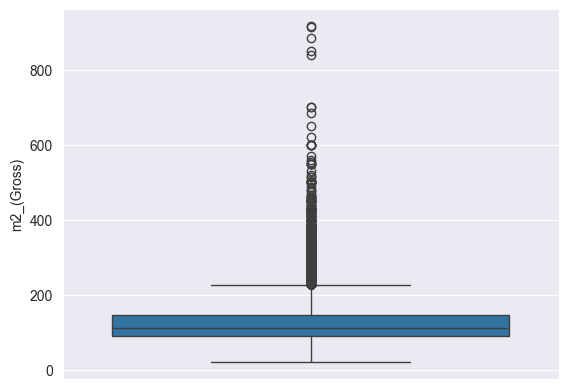

In [37]:
sns.boxplot(y="m2_(Gross)", data=data)

In [38]:
filtered_data = data[data["m2_(Gross)"] >= 500].sort_values(by="m2_(Gross)", ascending=False)
print(filtered_data)

           District      Neighborhood  Price_(TL)  m2_(Gross)  m²_(Net)  \
34085        Kartal   Kordonboyu Mah.  14760000.0         917     917.0   
12503  Büyükçekmece    Pınartepe Mah.   1380000.0         914     370.0   
33375    Eyüpsultan  Emniyettepe Mah.    420000.0         885      55.0   
30973    Bayrampaşa   Altıntepsi Mah.    270000.0         850      75.0   
24867       Kadıköy   Fenerbahçe Mah.  10000000.0         840     580.0   
33262       Sarıyer      Tarabya Mah.  12450000.0         700     400.0   
15604      Beşiktaş         Ulus Mah.  18000000.0         700     560.0   
4490       Bakırköy    Şenlikköy Mah.   1600000.0         684     157.0   
25068      Beşiktaş         Ulus Mah.  20000000.0         650     570.0   
19827      Bakırköy    Şenlikköy Mah.  11750000.0         620     550.0   
34283      Beşiktaş      Levazım Mah.  10500000.0         600     300.0   
29708       Sarıyer   Kireçburnu Mah.  13000000.0         600     550.0   
27032      Bakırköy     B

In [39]:
data = data.drop(index=[33375, 30973, 4490, 24553])

<Axes: ylabel='m2_(Gross)'>

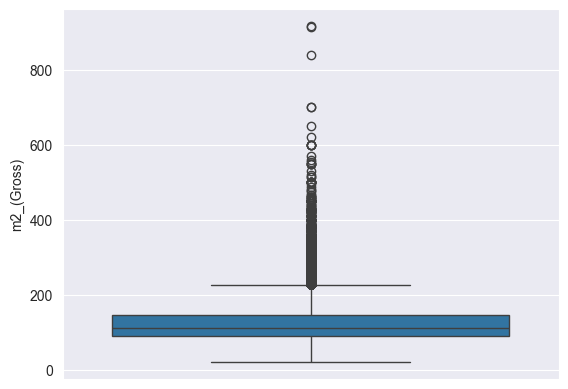

In [40]:
sns.boxplot(y="m2_(Gross)", data=data)

## m² (Net)

In [41]:
data.rename(columns={"m²_(Net)": "m2_(Net)"}, inplace=True)

In [42]:
nan_indexes = data[data["m2_(Net)"].isna()].index
print(nan_indexes)

Index([   81,   770,  4386,  4387,  4388,  4389,  4390,  4391,  4392,  4393,
        6575,  8107, 10986, 13260, 14511, 15698, 16044, 19274, 21685, 22158,
       23648, 26769, 27071, 27779, 30300, 30739, 34000, 34099],
      dtype='int64')


In [43]:
data["m2_(Net)"] = data.groupby(["Neighborhood", "Number_of_rooms", "Building_Age"])["m2_(Net)"] \
                       .transform(lambda x: x.fillna(x.median()))

C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\lib\site-packages\numpy\lib

In [44]:
nan_indexes = data[data['m2_(Net)'].isna()].index
print(nan_indexes)

Index([770, 4391, 6575, 16044, 27071, 27779, 30739, 34000, 34099], dtype='int64')


In [45]:
# If there is still NaN, fill the entire dataset with the median
data["m2_(Net)"] = data["m2_(Net)"].fillna(data["m2_(Net)"].median())

In [46]:
data[data["m2_(Net)"].isna()].index

Index([], dtype='int64')

<Axes: ylabel='m2_(Net)'>

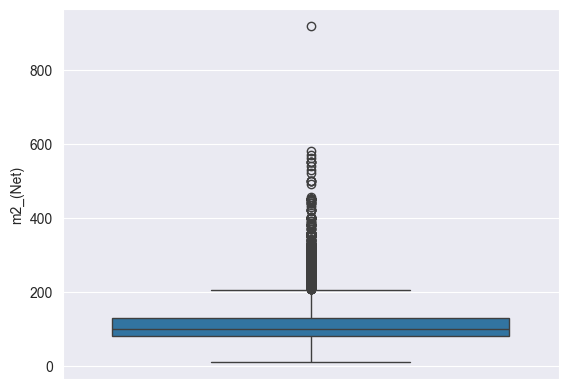

In [47]:
sns.boxplot(y="m2_(Net)", data=data)

In [48]:
filtered_data = data[data["m2_(Net)"] >= 500].sort_values(by="m2_(Gross)", ascending=False)
print(filtered_data)

         District     Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
34085      Kartal  Kordonboyu Mah.  14760000.0         917     917.0   
24867     Kadıköy  Fenerbahçe Mah.  10000000.0         840     580.0   
15604    Beşiktaş        Ulus Mah.  18000000.0         700     560.0   
25068    Beşiktaş        Ulus Mah.  20000000.0         650     570.0   
19827    Bakırköy   Şenlikköy Mah.  11750000.0         620     550.0   
20740     Sarıyer     İstinye Mah.   9950000.0         600     500.0   
29708     Sarıyer  Kireçburnu Mah.  13000000.0         600     550.0   
32510    Beşiktaş        Ulus Mah.  11500000.0         600     550.0   
27032    Bakırköy    Basınköy Mah.   7000000.0         600     530.0   
4385   Beylikdüzü     Marmara Mah.   1600000.0         570     550.0   
25447    Beşiktaş        Ulus Mah.  18750000.0         560     540.0   
30672    Bakırköy    Yeşilköy Mah.   9000000.0         550     500.0   
13801    Bakırköy   Şenlikköy Mah.   4375000.0         550     5

In [49]:
data.loc[28380, "m2_(Net)"] = 150

In [50]:
print(data[data["m2_(Net)"] > data["m2_(Gross)"]])

            District                Neighborhood  Price_(TL)  m2_(Gross)  \
770         Ataşehir                  Fetih Mah.    265000.0          55   
4390        Esenyurt  Necip Fazıl Kısakürek Mah.    225000.0          88   
4391        Esenyurt                Üçevler Mah.    175000.0          70   
8039         Beyoğlu      Kadımehmet Efendi Mah.    550000.0         150   
8107   Gaziosmanpaşa             Bağlarbaşı Mah.    420000.0         150   
10986       Bağcılar                 Merkez Mah.    390000.0         115   
19274       Ataşehir                  İnönü Mah.    285000.0          50   
27328    Sultanbeyli                   Adil Mah.    350000.0         116   
30819         Beykoz                Göztepe Mah.    825000.0         135   

       m2_(Net) Number_of_rooms   Building_Age Floor_location  \
770       100.0             1+1              0              1   
4390      125.0             2+1   5-10 between             18   
4391      100.0             1+1             

In [51]:
data.loc[data["m2_(Net)"] >= data["m2_(Gross)"], "m2_(Net)"] = data.loc[data["m2_(Net)"] >= data["m2_(Gross)"], "m2_(Gross)"]

In [52]:
print(data.loc[[770, 4390, 4391, 8039, 8107, 10986, 19274, 27328, 30819], ["m2_(Net)", "m2_(Gross)", "Price_(TL)"]])

       m2_(Net)  m2_(Gross)  Price_(TL)
770        55.0          55    265000.0
4390       88.0          88    225000.0
4391       70.0          70    175000.0
8039      150.0         150    550000.0
8107      150.0         150    420000.0
10986     115.0         115    390000.0
19274      50.0          50    285000.0
27328     116.0         116    350000.0
30819     135.0         135    825000.0


In [53]:
# 34085=917 m2 (Net)
data = data.drop(index=[34085])

<Axes: ylabel='m2_(Net)'>

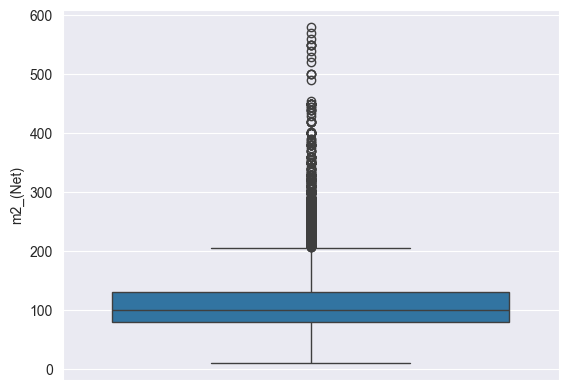

In [54]:
sns.boxplot(y="m2_(Net)", data=data)

In [55]:
filtered_m2net_data = data[data["m2_(Net)"] >= 450].sort_values(by="m2_(Net)", ascending=False)
print(filtered_m2net_data)

           District     Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
24867       Kadıköy  Fenerbahçe Mah.  10000000.0         840     580.0   
25068      Beşiktaş        Ulus Mah.  20000000.0         650     570.0   
15604      Beşiktaş        Ulus Mah.  18000000.0         700     560.0   
4385     Beylikdüzü     Marmara Mah.   1600000.0         570     550.0   
19827      Bakırköy   Şenlikköy Mah.  11750000.0         620     550.0   
29708       Sarıyer  Kireçburnu Mah.  13000000.0         600     550.0   
32510      Beşiktaş        Ulus Mah.  11500000.0         600     550.0   
25447      Beşiktaş        Ulus Mah.  18750000.0         560     540.0   
27032      Bakırköy    Basınköy Mah.   7000000.0         600     530.0   
6574       Güngören   Gençosman Mah.    650000.0         521     521.0   
13801      Bakırköy   Şenlikköy Mah.   4375000.0         550     500.0   
30672      Bakırköy    Yeşilköy Mah.   9000000.0         550     500.0   
20740       Sarıyer     İstinye Mah.  

In [56]:
indexes_to_drop = filtered_m2net_data.index

data = data.drop(index=indexes_to_drop)

<Axes: ylabel='m2_(Net)'>

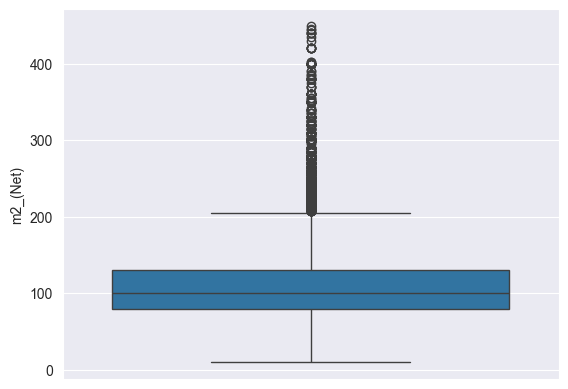

In [57]:
sns.boxplot(y="m2_(Net)", data=data)

In [58]:
filtered_m2net205_data = data[data["m2_(Net)"] > 205].sort_values(by="Price_(TL)", ascending=False)
print(filtered_m2net205_data)

          District      Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
33970     Beşiktaş         Ulus Mah.  27500000.0         350     300.0   
34308     Beşiktaş         Ulus Mah.  26000000.0         350     290.0   
29445     Beşiktaş         Ulus Mah.  26000000.0         420     350.0   
25408     Beşiktaş         Ulus Mah.  25000000.0         300     260.0   
24073     Beşiktaş      Levazım Mah.  25000000.0         474     400.0   
...            ...               ...         ...         ...       ...   
22847   Beylikdüzü   Cumhuriyet Mah.    289000.0         225     210.0   
29681      Esenler  Yavuz Selim Mah.    285000.0         230     220.0   
22630  Sultanbeyli    Hasanpaşa Mah.    280000.0         270     250.0   
26180      Silivri   Cumhuriyet Mah.    270000.0         235     210.0   
7027       Çatalca        Fatih Mah.    200000.0         403     402.0   

      Number_of_rooms       Building_Age  Floor_location Number_of_floors  \
33970             4+2      11-15 b

In [59]:
filtered_m2net205_price128_data = data[(data["m2_(Net)"] > 205) & (data["Price_(TL)"] > 1208000)].sort_values(by="Price_(TL)", ascending=False)
print(filtered_m2net205_price128_data)

           District             Neighborhood  Price_(TL)  m2_(Gross)  \
33970      Beşiktaş                Ulus Mah.  27500000.0         350   
34308      Beşiktaş                Ulus Mah.  26000000.0         350   
29445      Beşiktaş                Ulus Mah.  26000000.0         420   
25408      Beşiktaş                Ulus Mah.  25000000.0         300   
24073      Beşiktaş             Levazım Mah.  25000000.0         474   
...             ...                      ...         ...         ...   
6528   Küçükçekmece             Atakent Mah.   1250000.0         240   
10530  Büyükçekmece  Mimar Sinan Merkez Mah.   1250000.0         255   
20522       Üsküdar  Aziz Mahmut Hüdayi Mah.   1250000.0         240   
4351        Çatalca              Oklalı Mah.   1250000.0         320   
25037  Büyükçekmece               Fatih Mah.   1250000.0         245   

       m2_(Net) Number_of_rooms       Building_Age  Floor_location  \
33970     300.0             4+2      11-15 between  Entrance floo

In [60]:
data["Price_(TL)"].describe()

count    3.480800e+04
mean     7.359922e+05
std      1.336883e+06
min      2.000000e+04
25%      2.780000e+05
50%      4.000000e+05
75%      6.500000e+05
max      2.750000e+07
Name: Price_(TL), dtype: float64

<Axes: ylabel='m2_(Net)'>

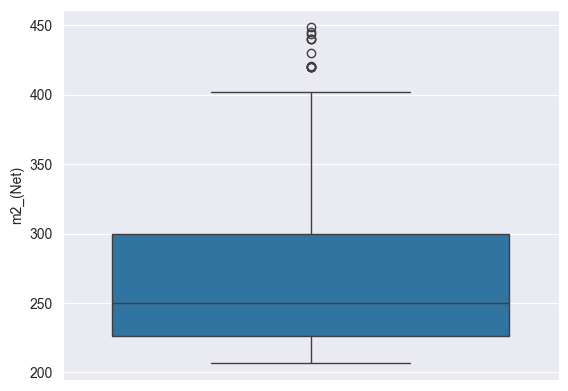

In [61]:
sns.boxplot(y="m2_(Net)", data=filtered_m2net205_price128_data)

## Number of rooms

In [62]:
data["Number_of _rooms"] = data["Number_of_rooms"].replace("10 and more than", "10+")

In [63]:
data["Number_of_rooms"].value_counts()

Number_of_rooms
2+1                 15788
3+1                  9850
1+1                  3172
4+1                  2283
4+2                  1020
3+2                   663
5+1                   598
5+2                   420
2+2                   224
Studio (1+0)          170
3.5+1                 117
6+2                   107
6+1                    84
1.5+1                  71
2.5+1                  60
4.5+1                  55
4+3                    38
7+1                    22
2+0                    20
7+2                    11
5+3                     7
4+4                     7
6+3                     5
8+1                     4
10 and more than        3
7+3                     3
5+4                     2
8+4                     2
8+2                     1
8+3                     1
Name: count, dtype: int64

<Axes: ylabel='Number_of_rooms'>

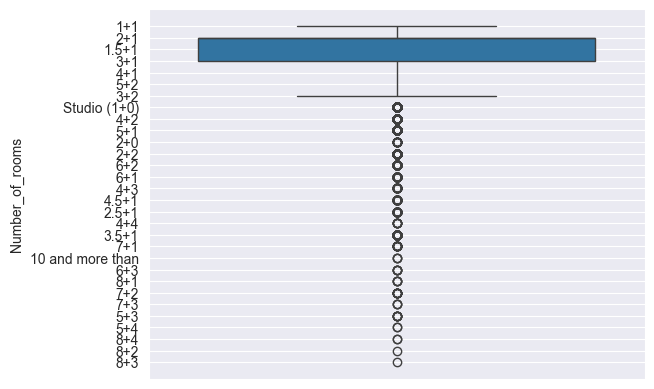

In [64]:
sns.boxplot(y="Number_of_rooms", data=data)

In [65]:
import re

def parse_rooms(x):
    if not isinstance(x, str):
        return np.nan, np.nan

    x = x.strip()

    # Studio (1+0)
    if "studio" in x.lower():
        return 1, 0

    # "10 and more" → 10+0
    if "and more" in x.lower():
        return 10, 1

    # General format: A+B, A.B+B or A+B.B etc.
    match = re.match(r"(\d+(\.\d+)?)[\+](\d+(\.\d+)?)", x)
    if match:
        rooms = float(match.group(1))
        living = float(match.group(3))
        return rooms, living

    # If only a number is given (e.g. "2")
    if x.isdigit():
        return float(x), 0

    # if it cannot be parsed
    return np.nan, np.nan

data["Room_number"], data["Livingroom_number"] = zip(*data["Number_of_rooms"].map(parse_rooms))


<Axes: ylabel='Room_number'>

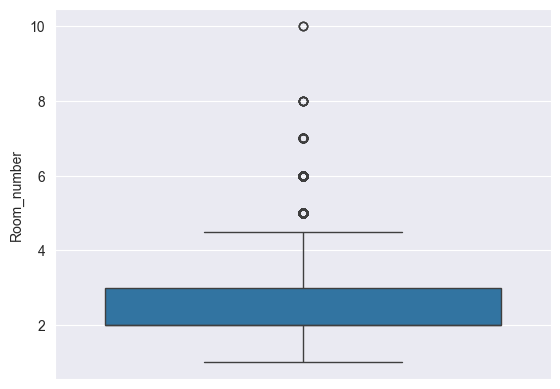

In [66]:
sns.boxplot(y="Room_number", data=data)

<Axes: ylabel='Livingroom_number'>

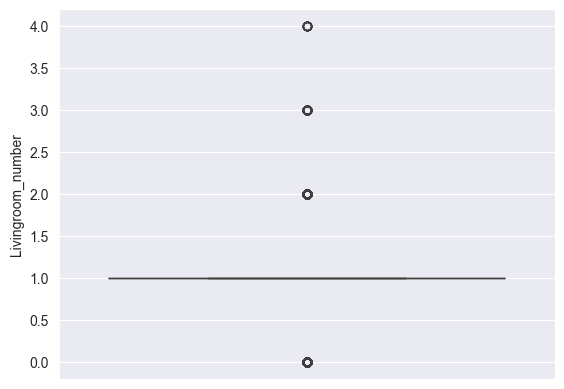

In [67]:
sns.boxplot(y="Livingroom_number", data=data)

In [68]:
data["Room_number"].value_counts()

Room_number
2.0     16032
3.0     10513
4.0      3348
1.0      3342
5.0      1027
6.0       196
3.5       117
1.5        71
2.5        60
4.5        55
7.0        36
8.0         8
10.0        3
Name: count, dtype: int64

In [69]:
data["Livingroom_number"].value_counts()

Livingroom_number
1.0    32107
2.0     2446
0.0      190
3.0       54
4.0       11
Name: count, dtype: int64

## Building Age

In [70]:
data["Building_Age"] = data["Building_Age"].replace({
    "31  and more than": "31+",
    "5-10 between": "5-10",
    "11-15 between": "11-15",
    "16-20 between": "16-20",
    "21-25 between": "21-25",
    "26-30 between": "26-30"
})

In [71]:
data["Building_Age"].value_counts()

Building_Age
0        10237
5-10      5481
4         2592
21-25     2570
16-20     2436
26-30     2185
1         2123
31+       1967
11-15     1804
2         1755
3         1658
Name: count, dtype: int64

<Axes: ylabel='Building_Age'>

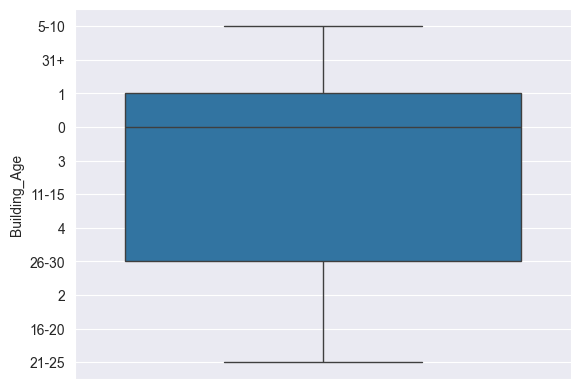

In [72]:
sns.boxplot(y="Building_Age", data=data)

## Floor location

In [73]:
floor_mapping = {
    "Ground floor": 0,
    "Entrance floor": 0,
    "High entrance": 0,
    "Garden Floor": 0,
    "Basement": -1,
    "Kot 1": -1,
    "Kot 2": -2,
    "Kot 3": -3,
    "Kot 4": -4,
    "Penthouse": 99,
    "Villa type": 100,
    "Private": 101
}

data["Floor_location"] = data["Floor_location"].replace("30  and more than", "30")
data["Floor_location"] = data["Floor_location"].replace(floor_mapping)
data["Floor_location"] = pd.to_numeric(data["Floor_location"], errors="ignore")

C:\Users\mcubukluoz\AppData\Local\Temp\ipykernel_15200\2504881677.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data["Floor_location"] = pd.to_numeric(data["Floor_location"], errors="ignore")


In [74]:
data["Floor_location"].value_counts()

Floor_location
 0      7060
 3      4954
 2      4856
 1      4216
 4      4161
 5      2489
 6      1029
-1       771
 7       767
 8       557
 9       464
 10      442
 99      392
-2       335
 11      316
 12      285
-3       278
-4       232
 13      199
 14      167
 15      132
 30       86
 16       82
 18       77
 17       69
 100      62
 20       55
 21       39
 101      39
 22       36
 19       34
 25       27
 23       26
 24       25
 26       17
 27       12
 29       10
 28       10
Name: count, dtype: int64

<Axes: ylabel='Floor_location'>

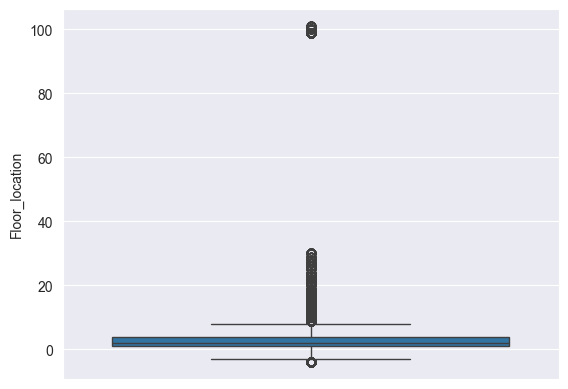

In [75]:
sns.boxplot(y="Floor_location", data=data)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34808 entries, 0 to 34842
Data columns (total 181 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    District                         34808 non-null  object 
 1    Neighborhood                     34808 non-null  object 
 2    Price_(TL)                       34808 non-null  float64
 3    m2_(Gross)                       34808 non-null  int64  
 4    m2_(Net)                         34808 non-null  float64
 5    Number_of_rooms                  34808 non-null  object 
 6    Building_Age                     34808 non-null  object 
 7    Floor_location                   34808 non-null  int64  
 8    Number_of_floors                 34808 non-null  object 
 9    Heating                          34808 non-null  object 
 10   Number_of_bathrooms              34808 non-null  object 
 11   Balcony                          34808 non-null  object 
 12   Furnish

## Number of floors

In [77]:
data["Number_of_floors"] = data["Number_of_floors"].replace("30  and more than", "30")
data["Number_of_floors"] = data["Number_of_floors"].astype(int)

<Axes: ylabel='Number_of_floors'>

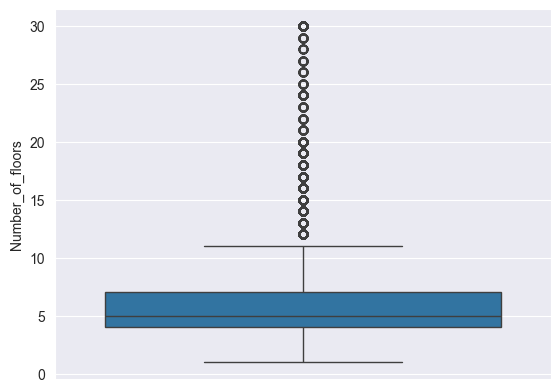

In [78]:
sns.boxplot(y="Number_of_floors", data=data)

## Heating

In [79]:
data["Heating"].value_counts()

Heating
Natural Gas (Combi)     26695
Center (Share Meter)     5299
Central system           1381
Underfloor heating        435
Naturel gas Stovesı       389
Floor Heating             195
Absent                    158
Stove                     113
Climate                    51
Fancoil Ünitesi            31
VRV                        28
Jeotermal                  15
Fancoil ünitesi            10
Fireplace                   5
Solar energy                2
Heat pump                   1
Name: count, dtype: int64

In [80]:
data["Heating"] = data["Heating"].replace({
    "Fancoil ünitesi": "Fancoil Ünitesi",
    "Naturel gas Stovesı": "Natural Gas (Combi)",
    "Floor Heating": "Underfloor heating",
    "Center (Share Meter)": "Central (Share Meter)"
})

In [81]:
data["Heating"].value_counts()

Heating
Natural Gas (Combi)      27084
Central (Share Meter)     5299
Central system            1381
Underfloor heating         630
Absent                     158
Stove                      113
Climate                     51
Fancoil Ünitesi             41
VRV                         28
Jeotermal                   15
Fireplace                    5
Solar energy                 2
Heat pump                    1
Name: count, dtype: int64

In [82]:
data["Heating"] = data["Heating"].replace({
    "Natural Gas (Combi)": "Natural Gas",
    "Central (Share Meter)": "Central Heating",
    "Central system": "Central Heating",
    "Underfloor heating": "Other Heating",
    "Fancoil Ünitesi": "Other Heating",
    "VRV": "Other Heating",
    "Jeotermal": "Other Heating",
    "Fireplace": "Other Heating",
    "Solar energy": "Other Heating",
    "Heat pump": "Other Heating",
    "Stove": "Stove",
    "Climate": "Climate",
    "Absent": "Absent"
})

In [83]:
data["Heating"] = data["Heating"].astype("category")

In [84]:
data["Heating"].value_counts()

Heating
Natural Gas        27084
Central Heating     6680
Other Heating        722
Absent               158
Stove                113
Climate               51
Name: count, dtype: int64

<Axes: ylabel='Heating'>

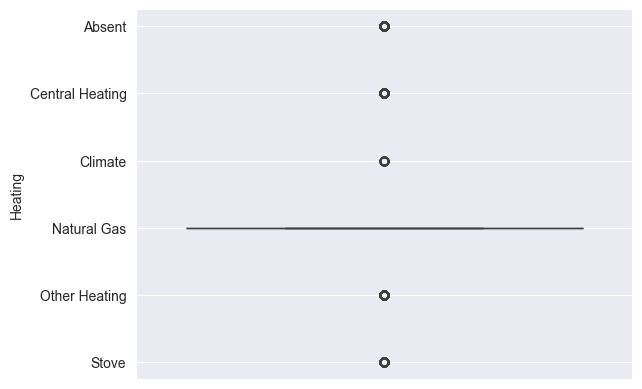

In [85]:
sns.boxplot(y="Heating", data=data)

## Number of bathrooms

In [86]:
data["Number_of_bathrooms"] = data["Number_of_bathrooms"].replace("6 and more than", "7")
data["Number_of_bathrooms"] = data["Number_of_bathrooms"].replace("Absent", "0")
data["Number_of_bathrooms"] = data["Number_of_bathrooms"].astype(int)

In [87]:
data["Number_of_bathrooms"].value_counts()

Number_of_bathrooms
1    21304
2    11445
3     1649
4      293
0       60
5       45
6        9
7        3
Name: count, dtype: int64

<Axes: ylabel='Number_of_bathrooms'>

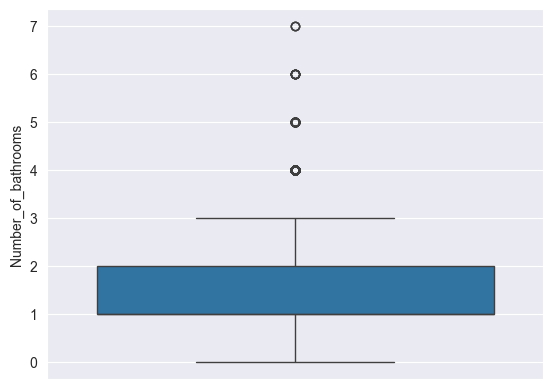

In [88]:
sns.boxplot(y="Number_of_bathrooms", data=data)

In [89]:
filtered_bath_data = data[data["Number_of_bathrooms"] >= 5].sort_values(by="m2_(Net)", ascending=False)
print(filtered_bath_data)

           District              Neighborhood  Price_(TL)  m2_(Gross)  \
33908      Beşiktaş                 Ulus Mah.  15000000.0         450   
4384     Arnavutköy             İslambey Mah.   1450000.0         480   
4382        Silivri           Sancaktepe Mah.    735000.0         435   
34059  Büyükçekmece                  Mimaroba   2500000.0         455   
20821       Sarıyer           Ferahevler Mah.  10000000.0         420   
30273    Arnavutköy              Anadolu Mah.   1120000.0         450   
28061       Sarıyer              İstinye Mah.  22500000.0         455   
4380        Sarıyer           Ferahevler Mah.   5250000.0         425   
759         Sarıyer              İstinye Mah.   9950000.0         500   
12365      Bakırköy            Yeşilyurt Mah.   7000000.0         360   
4379       Bakırköy  Ataköy 2-5-6. Kısım Mah.  16000000.0         430   
24828       Üsküdar            Burhaniye Mah.   9750000.0         380   
29186       Beyoğlu            Yenişehir Mah.    95

In [90]:
wrong_idx = [29187, 22682, 14702, 2629, 26270, 33901, 14707, 27420, 30240, 12821]
for idx in wrong_idx:
    m2_value = data.loc[idx, "m2_(Net)"]

    mean_bath = data[
        (data["m2_(Net)"] >= m2_value - 20) &
        (data["m2_(Net)"] <= m2_value + 20)
    ]["Number_of_bathrooms"].median()

    data.loc[idx, "Number_of_bathrooms"] = int(round(mean_bath))

In [91]:
print(data.loc[wrong_idx]["Number_of_bathrooms"])

29187    2
22682    1
14702    1
2629     1
26270    1
33901    2
14707    1
27420    1
30240    1
12821    1
Name: Number_of_bathrooms, dtype: int64


In [92]:
filtered_bath_data = data[ (data["Number_of_bathrooms"] >= 4) & (data["Number_of_bathrooms"] < 5)].sort_values(by="m2_(Net)", ascending=False)
print(filtered_bath_data)

            District        Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
6573      Başakşehir       Kayabaşı Mah.   3500000.0         444     444.0   
4383        Bakırköy      Şenlikköy Mah.   9750000.0         450     440.0   
14472  Gaziosmanpaşa       Hürriyet Mah.   1150000.0         450     440.0   
34070       Beşiktaş           Ulus Mah.   8500000.0         422     421.0   
12364       Bakırköy      Şenlikköy Mah.   7500000.0         430     420.0   
...              ...                 ...         ...         ...       ...   
2097           Fatih  Haseki Sultan Mah.    430000.0          90      85.0   
4865         Beyoğlu   Küçük Piyale Mah.    825000.0          75      75.0   
1270         Esenler           Tuna Mah.    275000.0          70      70.0   
25036       Bakırköy      Yeşilyurt Mah.   5500000.0         380      15.0   
182      Zeytinburnu       Nuripaşa Mah.     20000.0          20      15.0   

      Number_of_rooms Building_Age  Floor_location  Number_of_f

In [93]:
# 182 drop
# 25036 380 gross net 15 numberofrooms 6+2
# 8685, 30518, 19638, 31808, 2869, 2097, 4865, 1270

data = data.drop(index=182, errors="ignore")

idx_m2_fix = 25036
target_rooms = data.loc[idx_m2_fix, "Number_of_rooms"]
median_m2_for_rooms = data[data["Number_of_rooms"] == target_rooms]["m2_(Net)"].median()
data.loc[idx_m2_fix, "m2_(Net)"] = int(round(median_m2_for_rooms))

wrong_idx = [8685, 30518, 19638, 31808, 2869, 2097, 4865, 1270]
for idx in wrong_idx:
    m2_value = data.loc[idx, "m2_(Net)"]

    mean_bath = data[
        (data["m2_(Net)"] >= m2_value - 20) &
        (data["m2_(Net)"] <= m2_value + 20)
    ]["Number_of_bathrooms"].median()

    data.loc[idx, "Number_of_bathrooms"] = int(round(mean_bath))

In [94]:
print(data.loc[wrong_idx][["Number_of_bathrooms","Number_of_rooms", "m2_(Net)"]])
print(data.loc[25036][["Number_of_bathrooms","Number_of_rooms", "m2_(Net)"]])

       Number_of_bathrooms Number_of_rooms  m2_(Net)
8685                     1             4+2     110.0
30518                    1             3+1     105.0
19638                    1             3+1     105.0
31808                    1             3+1     100.0
2869                     1             2+1     100.0
2097                     1             2+1      85.0
4865                     1             4+3      75.0
1270                     1             2+1      70.0
Number_of_bathrooms        4
Number_of_rooms          6+2
m2_(Net)               250.0
Name: 25036, dtype: object


In [95]:
filtered_bath_data = data[ (data["Number_of_bathrooms"] >= 4)][["Number_of_bathrooms", "Number_of_rooms", "m2_(Net)"]].sort_values(by="m2_(Net)", ascending=False)
print(filtered_bath_data)

       Number_of_bathrooms   Number_of_rooms  m2_(Net)
33908                    5               5+2     449.0
4384                     7  10 and more than     445.0
6573                     4               8+1     444.0
14472                    4               5+2     440.0
4383                     4               7+2     440.0
...                    ...               ...       ...
9180                     4               4+1     140.0
18628                    4               3+1     135.0
30661                    4               6+2     120.0
26332                    4               3+1     120.0
14002                    4               5+3     120.0

[332 rows x 3 columns]


## Furnished

In [96]:
data["Furnished"].value_counts(normalize=True)

Furnished
No         0.937311
Yes        0.039159
Unknown    0.023530
Name: proportion, dtype: float64

In [97]:
data = data.drop("Furnished", axis=1)

## Available for Loan

In [98]:
data["Available_for_Loan"] = data["Available_for_Loan"].astype("category")

In [99]:
data["Available_for_Loan"].value_counts()

Available_for_Loan
Yes        30227
No          4045
Unknown      535
Name: count, dtype: int64

## From who

In [100]:
data["From_who"] = data["From_who"].astype("category")

In [101]:
data["From_who"].value_counts()

From_who
From the real estate office      28795
From owner                        3238
From the construction company     2624
From bank                          150
Name: count, dtype: int64

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34807 entries, 0 to 34842
Data columns (total 180 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    District                         34807 non-null  object  
 1    Neighborhood                     34807 non-null  object  
 2    Price_(TL)                       34807 non-null  float64 
 3    m2_(Gross)                       34807 non-null  int64   
 4    m2_(Net)                         34807 non-null  float64 
 5    Number_of_rooms                  34807 non-null  object  
 6    Building_Age                     34807 non-null  object  
 7    Floor_location                   34807 non-null  int64   
 8    Number_of_floors                 34807 non-null  int64   
 9    Heating                          34807 non-null  category
 10   Number_of_bathrooms              34807 non-null  int64   
 11   Balcony                          34807 non-null  object  

## Swap

In [103]:
data = data.drop("Swap", axis=1)

## Front -West -East -South -North

In [104]:
directions = ['Front_West', 'Front_East', 'Front_South', 'Front_North']

def combine_directions(row):
    dirs = []
    if row['Front_West'] == 1:
        dirs.append('West')
    if row['Front_East'] == 1:
        dirs.append('East')
    if row['Front_South'] == 1:
        dirs.append('South')
    if row['Front_North'] == 1:
        dirs.append('North')
    return '-'.join(dirs) if dirs else 'None'

data['Front_combined'] = data.apply(combine_directions, axis=1)

# South=1, West=0.5, East=0.5, North=0
def direction_score(row):
    score = 0
    score += 0.5 * row['Front_West']
    score += 0.5 * row['Front_East']
    score += 1.0 * row['Front_South']
    score += 0.0 * row['Front_North']
    return score

data['Front_score'] = data.apply(direction_score, axis=1)

In [105]:
data[['Front_West','Front_East','Front_South','Front_North','Front_combined','Front_score']].head(10000)

Front_West  Front_East  Front_South  Front_North Front_combined  \
0               0           0            0            0           None   
1               0           0            0            0           None   
2               0           0            0            0           None   
3               0           0            0            0           None   
4               0           0            0            0           None   
...           ...         ...          ...          ...            ...   
10002           0           0            0            0           None   
10003           0           0            0            0           None   
10004           0           1            0            0           East   
10005           0           0            0            0           None   
10006           0           0            0            0           None   

       Front_score  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
10002          0.0  
10003          0.0  
10004          0.5  
10005          0.0  
10006          0.0  

[10000 rows x 6 columns]

In [106]:
data["Front_combined"].value_counts()

Front_combined
None                     10160
South                     8073
East-South                3603
West-East-South           2237
West-South                2013
West-East-South-North     1810
East                      1399
West-East                 1214
West                       983
South-North                882
East-North                 503
West-North                 483
North                      462
East-South-North           400
West-East-North            314
West-South-North           271
Name: count, dtype: int64

## Internet

In [107]:
data["Internet"] = data[["ADSL", "Fiber_Internet"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

## Security

In [108]:
data["Security"].value_counts()

Security
0    27202
1     7605
Name: count, dtype: int64

In [109]:
data["Alarm_(Thief)"].value_counts()

Alarm_(Thief)
0    32026
1     2781
Name: count, dtype: int64

In [110]:
data["Security_Alarm"] = data[["Security", "Alarm_(Thief)"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [111]:
data["Security_Alarm"].value_counts()

Security_Alarm
0    26331
1     8476
Name: count, dtype: int64

## Smart House

In [112]:
data["Smart_House"].value_counts()

Smart_House
0    32554
1     2253
Name: count, dtype: int64

## Elevator

In [113]:
data["Elevator"].value_counts()

Elevator
0    19847
1    14960
Name: count, dtype: int64

## Balcony

In [114]:
## Balcony

In [115]:
data["Balcony.1"].value_counts()

Balcony.1
1    17899
0    16908
Name: count, dtype: int64

In [116]:
if "Balcony" in data.columns:
    data.drop(columns=["Balcony"], inplace=True)


In [117]:
data.rename(columns={"Balcony.1": "Balcony"}, inplace=True)

In [118]:
data["Balcony"].value_counts()

Balcony
1    17899
0    16908
Name: count, dtype: int64

## Car Park

In [119]:
# Closed Garage/Car Park/Parking Lot

In [120]:
columns = ["Closed_Garage", "Car_park", "Parking_Lot"]

for col in columns:
    print(data[col].value_counts())

Closed_Garage
0    26708
1     8099
Name: count, dtype: int64
Car_park
0    22264
1    12543
Name: count, dtype: int64
Parking_Lot
0    27295
1     7512
Name: count, dtype: int64


In [121]:
data["Car_Park"] = data[["Closed_Garage", "Car_park", "Parking_Lot"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [122]:
data["Car_Park"].value_counts()

Car_Park
0    19960
1    14847
Name: count, dtype: int64

## Laminate Floor

In [123]:
data["Laminate_Floor"].value_counts()

Laminate_Floor
0    21238
1    13569
Name: count, dtype: int64

## Luxury_Facilities(Swim, Sauna, Jacuzzi)

In [124]:
cols = ["Swimming_Pool_(Open)", "Swimming_Pool_(Indoor)", "Swimming_pool", "Sauna", "Jacuzzi"]

data["Luxury_Facilities"] = data[cols].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [125]:
data["Luxury_Facilities"].value_counts()

Luxury_Facilities
0    28814
1     5993
Name: count, dtype: int64

## Airport, Marmaray, Metro, Metrobus, Minibus, Bus stop, Tram, Railway station, TEM, E-5

In [126]:
columns =["Airport", "Marmaray", "Metro", "Metrobus", "Minibus", "Bus_stop", "Tram", "Railway_station", "TEM", "E-5"]

for col in columns:
    print(data[col].value_counts())
    print()

Airport
0    27362
1     7445
Name: count, dtype: int64

Marmaray
0    29183
1     5624
Name: count, dtype: int64

Metro
0    22136
1    12671
Name: count, dtype: int64

Metrobus
0    26336
1     8471
Name: count, dtype: int64

Minibus
1    21145
0    13662
Name: count, dtype: int64

Bus_stop
1    22626
0    12181
Name: count, dtype: int64

Tram
0    30460
1     4347
Name: count, dtype: int64

Railway_station
0    30915
1     3892
Name: count, dtype: int64

TEM
0    24517
1    10290
Name: count, dtype: int64

E-5
0    21399
1    13408
Name: count, dtype: int64



## Pick Up Data Time

In [127]:
data = data.drop("Pick_Up_Data_Time", axis=1)

<Axes: ylabel='m2_(Net)'>

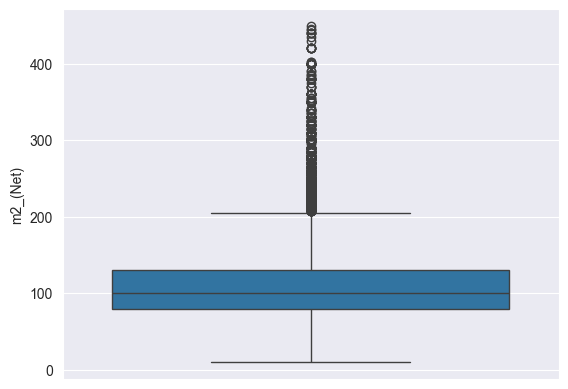

In [128]:
sns.boxplot(y="m2_(Net)", data=data)

In [129]:
filtered_m2net205_data2 = data[data["m2_(Net)"] > 205].sort_values(by="Price_(TL)", ascending=False)
print(filtered_m2net205_data2)

          District      Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
33970     Beşiktaş         Ulus Mah.  27500000.0         350     300.0   
29445     Beşiktaş         Ulus Mah.  26000000.0         420     350.0   
34308     Beşiktaş         Ulus Mah.  26000000.0         350     290.0   
24073     Beşiktaş      Levazım Mah.  25000000.0         474     400.0   
25408     Beşiktaş         Ulus Mah.  25000000.0         300     260.0   
...            ...               ...         ...         ...       ...   
22847   Beylikdüzü   Cumhuriyet Mah.    289000.0         225     210.0   
29681      Esenler  Yavuz Selim Mah.    285000.0         230     220.0   
22630  Sultanbeyli    Hasanpaşa Mah.    280000.0         270     250.0   
26180      Silivri   Cumhuriyet Mah.    270000.0         235     210.0   
7027       Çatalca        Fatih Mah.    200000.0         403     402.0   

      Number_of_rooms Building_Age  Floor_location  Number_of_floors  \
33970             4+2        11-15     

<Axes: ylabel='m2_(Net)'>

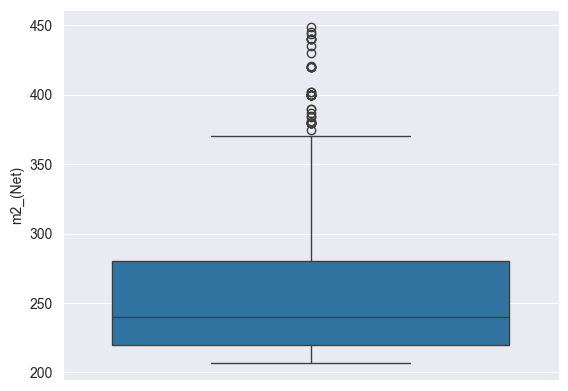

In [130]:
sns.boxplot(y="m2_(Net)", data=filtered_m2net205_data2)

In [131]:
filtered_m2net205_price128_data2 = data[(data["m2_(Net)"] > 205) & (data["Price_(TL)"] > 1208000)].sort_values(by="Price_(TL)", ascending=False)
print(filtered_m2net205_price128_data2)

           District   Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
33970      Beşiktaş      Ulus Mah.  27500000.0         350     300.0   
34308      Beşiktaş      Ulus Mah.  26000000.0         350     290.0   
29445      Beşiktaş      Ulus Mah.  26000000.0         420     350.0   
25408      Beşiktaş      Ulus Mah.  25000000.0         300     260.0   
24073      Beşiktaş   Levazım Mah.  25000000.0         474     400.0   
...             ...            ...         ...         ...       ...   
25037  Büyükçekmece     Fatih Mah.   1250000.0         245     225.0   
20807        Beykoz   Kavacık Mah.   1250000.0         360     220.0   
23029        Kartal  Petroliş Mah.   1250000.0         260     220.0   
22543   Zeytinburnu  Nuripaşa Mah.   1250000.0         230     210.0   
22970  Büyükçekmece   Atatürk Mah.   1250000.0         240     220.0   

      Number_of_rooms Building_Age  Floor_location  Number_of_floors  \
33970             4+2        11-15               0             

<Axes: ylabel='m2_(Net)'>

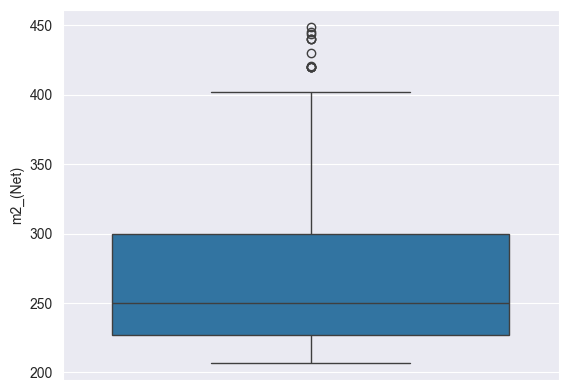

In [132]:
sns.boxplot(y="m2_(Net)", data=filtered_m2net205_price128_data2)

In [133]:
filtered_m2net205_data3 = data[data["m2_(Net)"] <= 205].sort_values(by="Price_(TL)", ascending=False)
print(filtered_m2net205_data3)

          District            Neighborhood  Price_(TL)  m2_(Gross)  m2_(Net)  \
31124     Beşiktaş              Bebek Mah.  23600000.0         220     200.0   
33814      Sarıyer        Baltalimanı Mah.  23500000.0         180     160.0   
25841       Beykoz     Anadolu Hisarı Mah.  22400000.0         210     200.0   
31123      Sarıyer        Baltalimanı Mah.  22000000.0         200     180.0   
14002      Beyoğlu         Hüseyinağa Mah.  21400000.0         133     120.0   
...            ...                     ...         ...         ...       ...   
13277   Arnavutköy            Anadolu Mah.     30000.0          80      70.0   
3646       Silivri               Yeni Mah.     22222.0         150     130.0   
4497    Arnavutköy  Arnavutköy Merkez Mah.     20000.0          20      20.0   
5746   Sultanbeyli           Mecidiye Mah.     20000.0         110     100.0   
883          Fatih          Şehremini Mah.     20000.0          52      52.0   

      Number_of_rooms Building_Age  Flo

<Axes: ylabel='m2_(Net)'>

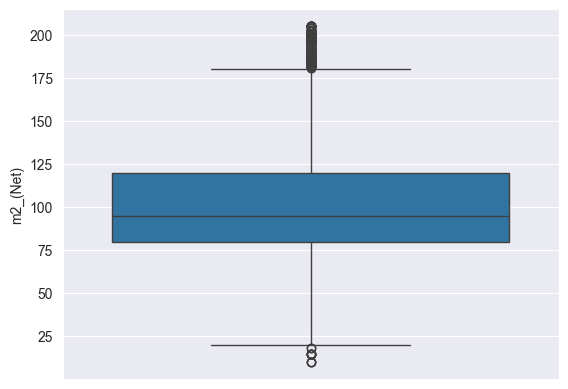

In [134]:
sns.boxplot(y="m2_(Net)", data=filtered_m2net205_data3)

In [135]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
filtered_m2net205_data3 = data[data["m2_(Net)"] <= 40].sort_values(by="m2_(Gross)", ascending=False)
print(filtered_m2net205_data3)

           District                   Neighborhood  Price_(TL)  m2_(Gross)  \
12696    Başakşehir       Bahçeşehir 1. Kısım Mah.   1600000.0         270   
25670    Arnavutköy                Karlıbayır Mah.    460000.0         240   
12695       Silivri                      Yeni Mah.    635000.0         196   
24459      Bakırköy                  Yeşilköy Mah.   3700000.0         180   
24807      Bakırköy                  Yeşilköy Mah.   8000000.0         155   
16651      Bağcılar                   Güneşli Mah.    475000.0         150   
30725       Silivri                      Yeni Mah.    547000.0         145   
10064      Çekmeköy               Mimar Sinan Mah.    525000.0         140   
772         Silivri               Mimar Sinan Mah.    270000.0         130   
23256      Bakırköy                 Yeşilyurt Mah.   2200000.0         130   
30726       Silivri                      Yeni Mah.    449000.0         121   
15245       Üsküdar         Mehmet Akif Ersoy Mah.    450000.0  

In [136]:
median_net = (
    data
    .groupby(["m2_(Gross)", "Number_of_rooms", "Building_Age"])["m2_(Net)"]
    .median()
)

indexes = [12696, 25670, 12695, 24459, 24807, 16651, 30725, 10064, 772, 23256, 30726, 15245, 15259]

for idx in indexes:
    row = data.loc[idx]
    key = (row["m2_(Gross)"], row["Number_of_rooms"], row["Building_Age"])

    if key in median_net.index:
        data.loc[idx, "m2_(Net)"] = int(round(median_net.loc[key]))

data.loc[771, "m2_(Net)"] = 45 #m2_(Net)= 15

print(
    data.loc[indexes,
    ["District", "Neighborhood", "m2_(Gross)", "Number_of_rooms", "m2_(Net)"]]
)

         District              Neighborhood  m2_(Gross) Number_of_rooms  \
12696  Başakşehir  Bahçeşehir 1. Kısım Mah.         270             4+1   
25670  Arnavutköy           Karlıbayır Mah.         240             6+2   
12695     Silivri                 Yeni Mah.         196             4+1   
24459    Bakırköy             Yeşilköy Mah.         180             3+1   
24807    Bakırköy             Yeşilköy Mah.         155             3+1   
16651    Bağcılar              Güneşli Mah.         150             4+1   
30725     Silivri                 Yeni Mah.         145             3+1   
10064    Çekmeköy          Mimar Sinan Mah.         140             3+1   
772       Silivri          Mimar Sinan Mah.         130             3+1   
23256    Bakırköy            Yeşilyurt Mah.         130             3+1   
30726     Silivri                 Yeni Mah.         121             2+1   
15245     Üsküdar    Mehmet Akif Ersoy Mah.         110             3+1   
15259     Silivri        

In [137]:
print(
    data.loc[12695]
)

District                                               Silivri
Neighborhood                                         Yeni Mah.
Price_(TL)                                            635000.0
m2_(Gross)                                                 196
m2_(Net)                                                 150.0
Number_of_rooms                                            4+1
Building_Age                                                 0
Floor_location                                               8
Number_of_floors                                             8
Heating                                        Central Heating
Number_of_bathrooms                                          2
Using_status                                              Free
Available_for_Loan                                         Yes
From_who                           From the real estate office
Front_West                                                   0
Front_East                                             

In [138]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

filtered_m2net205_data4 = data[data["m2_(Net)"] <= 181].sort_values(by="m2_(Net)", ascending=True)
print(filtered_m2net205_data4)

           District             Neighborhood  Price_(TL)  m2_(Gross)  \
4498        Çatalca          Ferhatpaşa Mah.    400000.0          20   
4497     Arnavutköy   Arnavutköy Merkez Mah.     20000.0          20   
11929      Ataşehir               Örnek Mah.    210000.0          31   
773    Bahçelievler    Yenibosna Merkez Mah.    370000.0          37   
23959        Kartal          Kordonboyu Mah.    300000.0          36   
...             ...                      ...         ...         ...   
10851    Arnavutköy  Mustafa Kemal Paşa Mah.    380000.0         190   
9254     Eyüpsultan      Göktürk Merkez Mah.   2600000.0         200   
25114    Sancaktepe                 Mer Mah.    229000.0         180   
16236       Maltepe            Esenkent Mah.   1250000.0         258   
4153    Sultanbeyli                Adil Mah.    870000.0         231   

       m2_(Net) Number_of_rooms Building_Age  Floor_location  \
4498       20.0             2+2            1              -4   
4497   

<Axes: ylabel='m2_(Net)'>

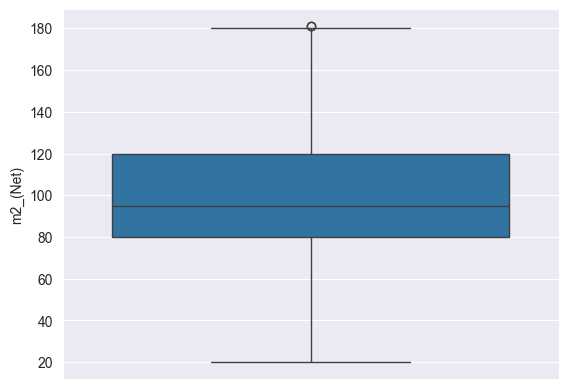

In [139]:
sns.boxplot(y="m2_(Net)", data=filtered_m2net205_data4)

In [140]:
filtered_m2netmin205_data = data[data["m2_(Net)"] > 205].sort_values(by="m2_(Net)", ascending=True)
print(filtered_m2netmin205_data)

            District              Neighborhood  Price_(TL)  m2_(Gross)  \
31031       Bakırköy  Ataköy 2-5-6. Kısım Mah.   7250000.0         259   
32027       Bakırköy  Ataköy 2-5-6. Kısım Mah.   7000000.0         259   
9412     Zeytinburnu              Maltepe Mah.   2650000.0         210   
20903       Beşiktaş              Ortaköy Mah.   9900000.0         255   
8135      Eyüpsultan           Düğmeciler Mah.   1250000.0         208   
...              ...                       ...         ...         ...   
33765     Başakşehir                Başak Mah.   4449999.0         440   
14472  Gaziosmanpaşa             Hürriyet Mah.   1150000.0         450   
6573      Başakşehir             Kayabaşı Mah.   3500000.0         444   
4384      Arnavutköy             İslambey Mah.   1450000.0         480   
33908       Beşiktaş                 Ulus Mah.  15000000.0         450   

       m2_(Net)   Number_of_rooms Building_Age  Floor_location  \
31031     207.0               3+1            

<Axes: ylabel='m2_(Net)'>

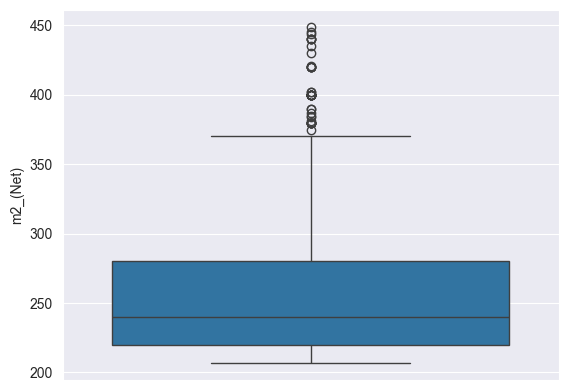

In [141]:
sns.boxplot(y="m2_(Net)", data=filtered_m2netmin205_data)

In [147]:
data.to_csv("data\CleanedHomeSaleData.csv", sep=";", index=False, encoding="utf-8-sig")

In [148]:
#dataCleaned = pd.read_csv("CleanedHomeSaleData.csv", sep=";")

In [149]:
#dataCleaned.head(26)

 # Data Visualization

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34807 entries, 0 to 34842
Data columns (total 183 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    District                         34807 non-null  object  
 1    Neighborhood                     34807 non-null  object  
 2    Price_(TL)                       34807 non-null  float64 
 3    m2_(Gross)                       34807 non-null  int64   
 4    m2_(Net)                         34807 non-null  float64 
 5    Number_of_rooms                  34807 non-null  object  
 6    Building_Age                     34807 non-null  object  
 7    Floor_location                   34807 non-null  int64   
 8    Number_of_floors                 34807 non-null  int64   
 9    Heating                          34807 non-null  category
 10   Number_of_bathrooms              34807 non-null  int64   
 11   Using_status                     34807 non-null  object  

In [151]:
columns = [
    "District",
    "Neighborhood",
    "Price_(TL)",
    "m2_(Gross)",
    "m2_(Net)",
    "Number_of_rooms",
    "Building_Age",
    "Floor_location",
    "Number_of_floors",
    "Heating",
    "Number_of_bathrooms",
    "Available_for_Loan",
    "From_who",
    "Front_West",
    "Front_East",
    "Front_South",
    "Front_North",
    "Front_combined",
    "Front_score",
    "Internet",
    "Security_Alarm",
    "Smart_House",
    "Elevator",
    "Balcony",
    "Car_Park",
    "Laminate_Floor",
    "Luxury_Facilities",
    "Airport",
    "Marmaray",
    "Metro",
    "Metrobus",
    "Minibus",
    "Bus_stop",
    "Tram",
    "Railway_station",
    "TEM",
    "E-5"
]

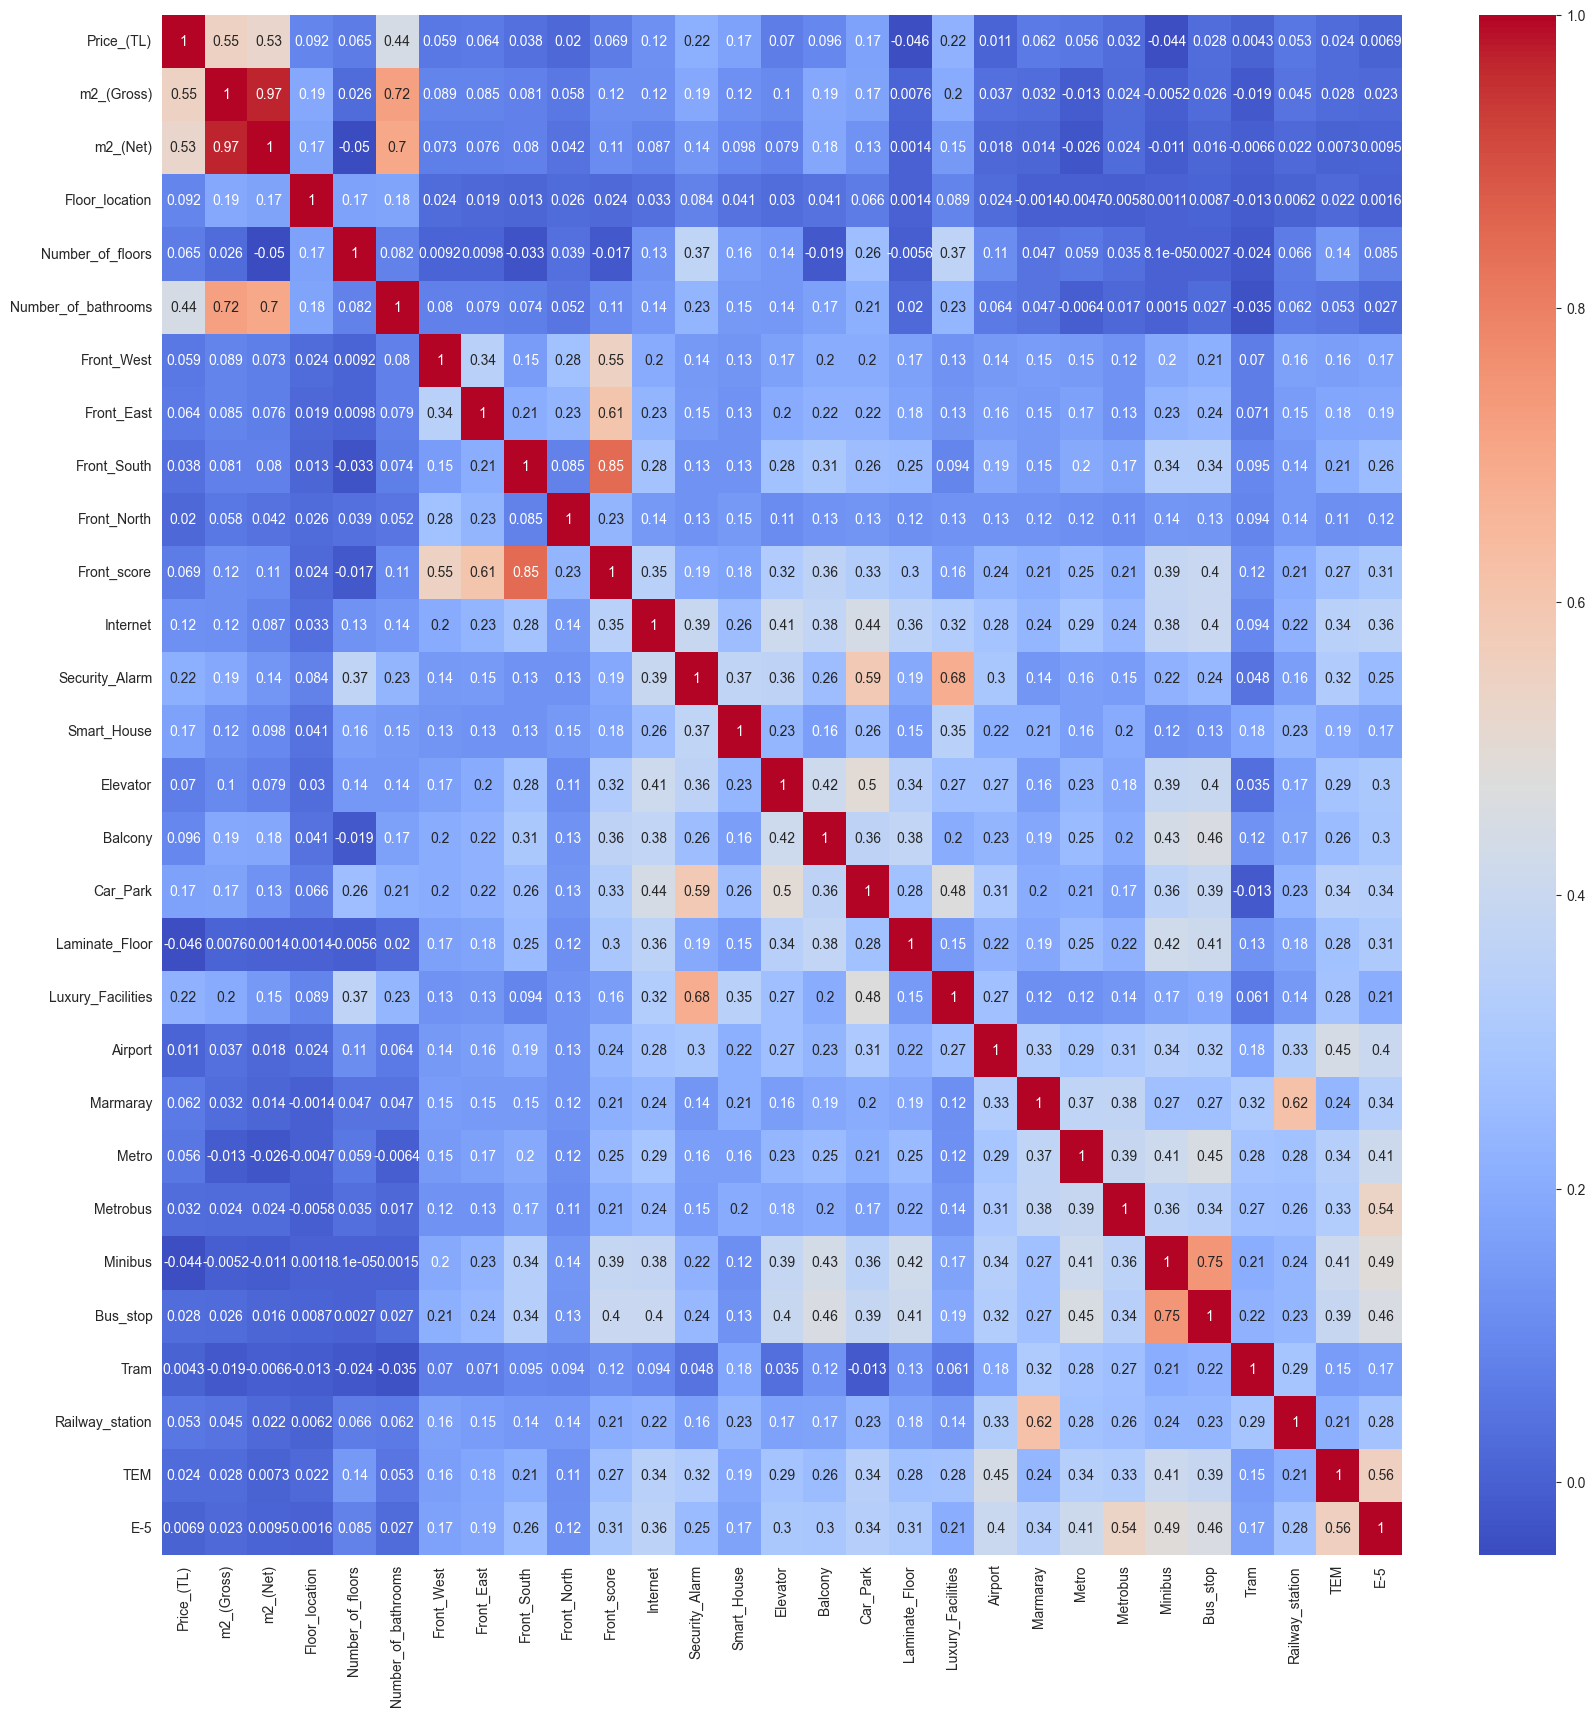

In [152]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[columns].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [153]:
"""
columns_other=["Price (TL)","Wood Joinery", "Alarm (Fire)", "Alaturka Toilet", "Aluminum joinery", "American Door", "American kitchen", "Built-in on", "Barbecue", "Household appliances", "Painted", "Dishwasher", "Refrigerator", "Wall paper", "Shower", "Parents' Bathroom", "On", "Dressing room", "Closet", "Video intercom", "Hilton Bathroom", "Intercom System", "Insulating glass", "Plasterboard", "Cellar", "Air conditioning", "Tub", "Marley", "Furniture", "Kitchen (Built-in)", "Kitchen (Laminate)", "Kitchen Natural Gas", "PVC Joinery", "Blinds", "Parquet Floor", "Ceramic Floor", "Set Top Cooker", "Spot Lighting", "Terrace", "Thermosiphon", "Cloakroom", "Wi-Fi", "Face Recognition & Fingerprint", "Washing Machine", "Washing machine", "Laundry room", "Steel door", "Water heater", "Fireplace", "Elevator.1", "Steam room", "Bath", "Booster", "Thermal Insulation", "Generator", "Cable TV", "Closed Garage", "Doorman", "Nursery", "With Private Pool", "Playground", "Sound insulation", "Siding", "Sports Area", "Water tank", "Tennis court", "Satellite", "Fire escape", "Elevator.2", "Bathroom", "Wide Corridor", "Entrance / Ramp", "Stairs", "Kitchen", "Room door", "Park", "Socket / Electric Switch", "Handle / Railing", "Toilet", "The mall", "municipality", "Mosque", "Cemevi", "Next to sea shore", "Pharmacy", "Amusement center", "Fair", "Hospital", "Synagogue", "The church", "High school", "Market", "Park.1", "Police station", "The health clinic", "District Market", "Gym", "Unirsity", "Primary School-Secondary School", "Fire Department", "Town center", "Highway", "Eurasia Tunnel", "Bosphorus Bridges", "Street", "Sea bus", "Filled", "Minibus", "Coast", "Cable car", "Tram", "Trolley bus", "Scaffolding", "Throat", "Sea", "Nature", "Lake", "Pool", "Park & ​​Green Area", "City", "Mezzanine", "Mezzanine Duplex", "Garden Duplex", "Garden Floor", "Garden", "Top floor", "Garage / Shop Top", "Entrance floor", "Floor Duplex", "Private Entry", "Rerse Duplex", "Triplex", "Ground floor", "Roof Duplex"]
"""
columns_other = [
    "Price_(TL)", "ADSL", "Wood_Joinery", "Smart_House", "Alarm_(Thief)", "Alarm_(Fire)", "Alaturka_Toilet", "Aluminum_joinery", "American_Door", "American_kitchen", "Built-in_on", "Elevator", "Barbecue", "Household_appliances", "Painted", "Dishwasher", "Refrigerator", "Wall_paper", "Shower", "Parents'_Bathroom", "Fiber_Internet", "On", "Dressing_room", "Closet", "Video_intercom", "Hilton_Bathroom", "Intercom_System", "Insulating_glass", "Jacuzzi", "Plasterboard", "Cellar", "Air_conditioning", "Tub", "Laminate_Floor", "Marley", "Furniture", "Kitchen_(Built-in)", "Kitchen_(Laminate)", "Kitchen_Natural_Gas", "PVC_Joinery", "Blinds", "Parquet_Floor", "Ceramic_Floor", "Set_Top_Cooker", "Spot_Lighting", "Terrace", "Thermosiphon", "Cloakroom", "Wi-Fi", "Face_Recognition_&_Fingerprint", "Washing_Machine", "Washing_machine", "Laundry_room", "Steel_door", "Water_heater", "Fireplace", "Elevator.1", "Steam_room", "Security", "Bath", "Booster", "Thermal_Insulation", "Generator", "Cable_TV", "Closed_Garage", "Doorman", "Nursery", "With_Private_Pool", "Car_park", "Playground", "Sauna", "Sound_insulation", "Siding", "Sports_Area", "Water_tank", "Tennis_court", "Satellite", "Fire_escape", "Swimming_Pool_(Open)", "Swimming_Pool_(Indoor)", "Parking_Lot", "Elevator.2", "Bathroom", "Wide_Corridor", "Entrance_/_Ramp", "Stairs", "Kitchen", "Room_door", "Park", "Socket_/_Electric_Switch", "Handle_/_Railing", "Toilet", "Swimming_pool", "The_mall", "municipality", "Mosque", "Cemevi", "Next_to_sea_shore", "Pharmacy", "Amusement_center", "Fair", "Hospital", "Synagogue", "The_church", "High_school", "Market", "Park.1", "Police_station", "The_health_clinic", "District_Market", "Gym", "Unirsity", "Primary_School-Secondary_School", "Fire_Department", "Town_center", "Highway", "Eurasia_Tunnel", "Bosphorus_Bridges", "Street", "Sea_bus", "Filled", "E-5", "Airport", "Marmaray", "Metro", "Metrobus", "Minibus", "Bus_stop", "Coast", "TEM", "Cable_car", "Tram", "Railway_station", "Trolley_bus", "Scaffolding", "Throat", "Sea", "Nature", "Lake", "Pool", "Park_&_​​Green_Area", "City", "Mezzanine", "Mezzanine_Duplex", "Garden_Duplex", "Garden_Floor", "Garden", "Top_floor", "Garage_/_Shop_Top", "Entrance_floor", "Floor_Duplex", "Private_Entry", "Rerse_Duplex", "Triplex", "Ground_floor", "Roof_Duplex"
]



In [154]:
for col in data.columns:
    print(col)

District
Neighborhood
Price_(TL)
m2_(Gross)
m2_(Net)
Number_of_rooms
Building_Age
Floor_location
Number_of_floors
Heating
Number_of_bathrooms
Using_status
Available_for_Loan
From_who
Front_West
Front_East
Front_South
Front_North
ADSL
Wood_Joinery
Smart_House
Alarm_(Thief)
Alarm_(Fire)
Alaturka_Toilet
Aluminum_joinery
American_Door
American_kitchen
Built-in_on
Elevator
Balcony
Barbecue
Household_appliances
Painted
Dishwasher
Refrigerator
Wall_paper
Shower
Parents'_Bathroom
Fiber_Internet
On
Dressing_room
Closet
Video_intercom
Hilton_Bathroom
Intercom_System
Insulating_glass
Jacuzzi
Plasterboard
Cellar
Air_conditioning
Tub
Laminate_Floor
Marley
Furniture
Kitchen_(Built-in)
Kitchen_(Laminate)
Kitchen_Natural_Gas
PVC_Joinery
Blinds
Parquet_Floor
Ceramic_Floor
Set_Top_Cooker
Spot_Lighting
Terrace
Thermosiphon
Cloakroom
Wi-Fi
Face_Recognition_&_Fingerprint
Washing_Machine
Washing_machine
Laundry_room
Steel_door
Water_heater
Fireplace
Elevator.1
Steam_room
Security
Bath
Booster
Thermal_Insula

In [155]:
pd.set_option('display.max_rows', None)

corr_with_price = data[columns_other].corr(numeric_only=True)["Price_(TL)"].sort_values(ascending=False)
print(corr_with_price)

Price_(TL)                         1.000000
Air_conditioning                   0.298671
Dressing_room                      0.290242
Parents'_Bathroom                  0.285100
Throat                             0.277863
Dishwasher                         0.260600
Household_appliances               0.255095
Laundry_room                       0.249802
Generator                          0.241523
Closet                             0.235882
Blinds                             0.233366
Refrigerator                       0.215374
Swimming_Pool_(Open)               0.212133
Closed_Garage                      0.211429
Sea                                0.208946
Built-in_on                        0.206430
Security                           0.204849
On                                 0.196860
Kitchen_(Built-in)                 0.188370
Cloakroom                          0.187459
Doorman                            0.180391
Water_tank                         0.176825
Tennis_court                    

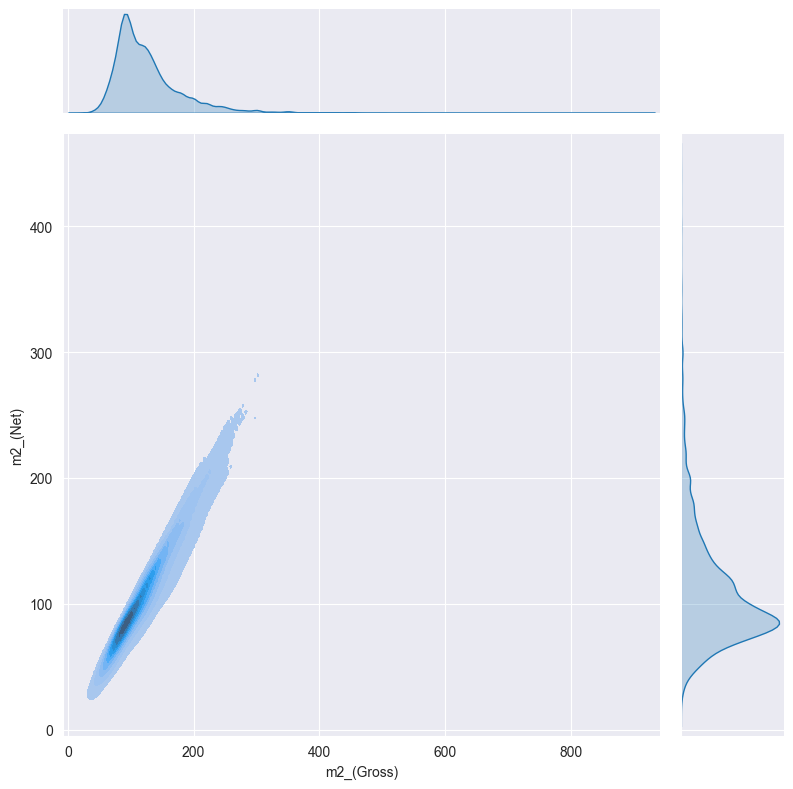

In [156]:
sns.jointplot(
    data=data,
    x="m2_(Gross)",
    y="m2_(Net)",
    kind="kde",
    fill=True,
    height=8
)
plt.show()


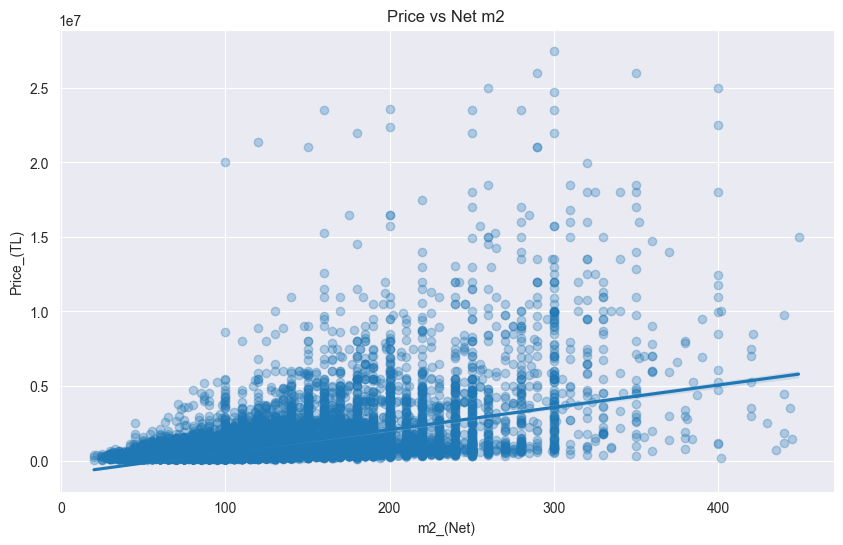

In [157]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=data,
    x="m2_(Net)",
    y="Price_(TL)",
    scatter_kws={"alpha":0.3}
)
plt.title("Price vs Net m2")
plt.show()


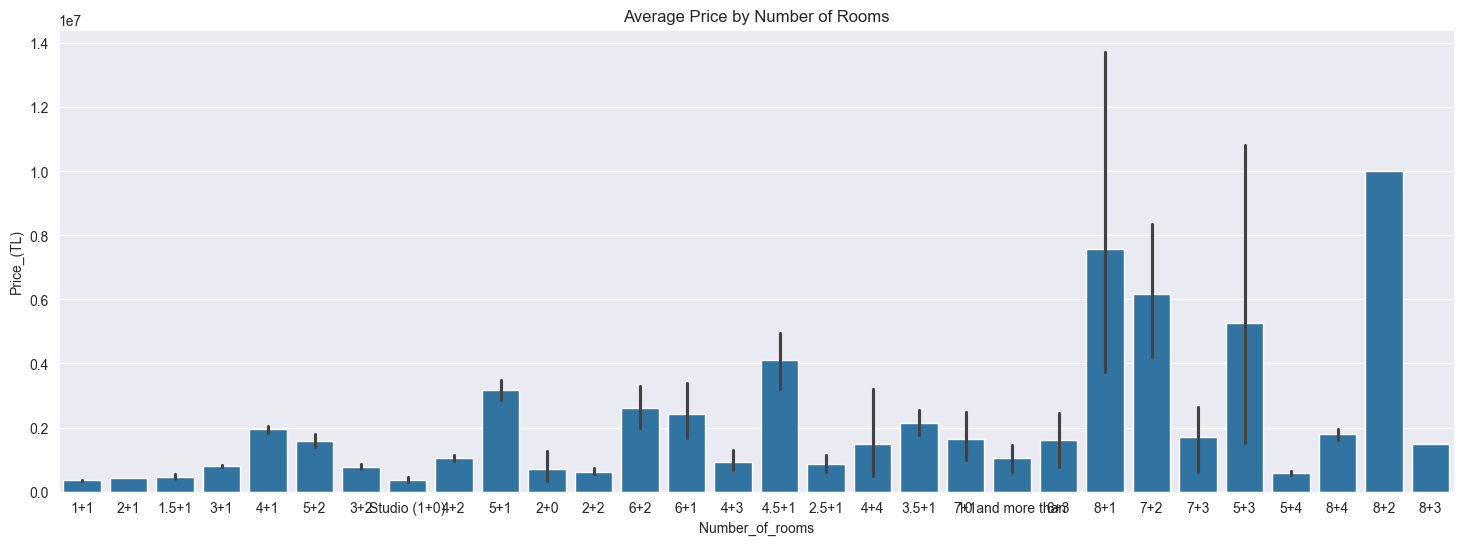

In [158]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Number_of_rooms",
    y="Price_(TL)",
    estimator="mean"
)
plt.title("Average Price by Number of Rooms")
plt.show()


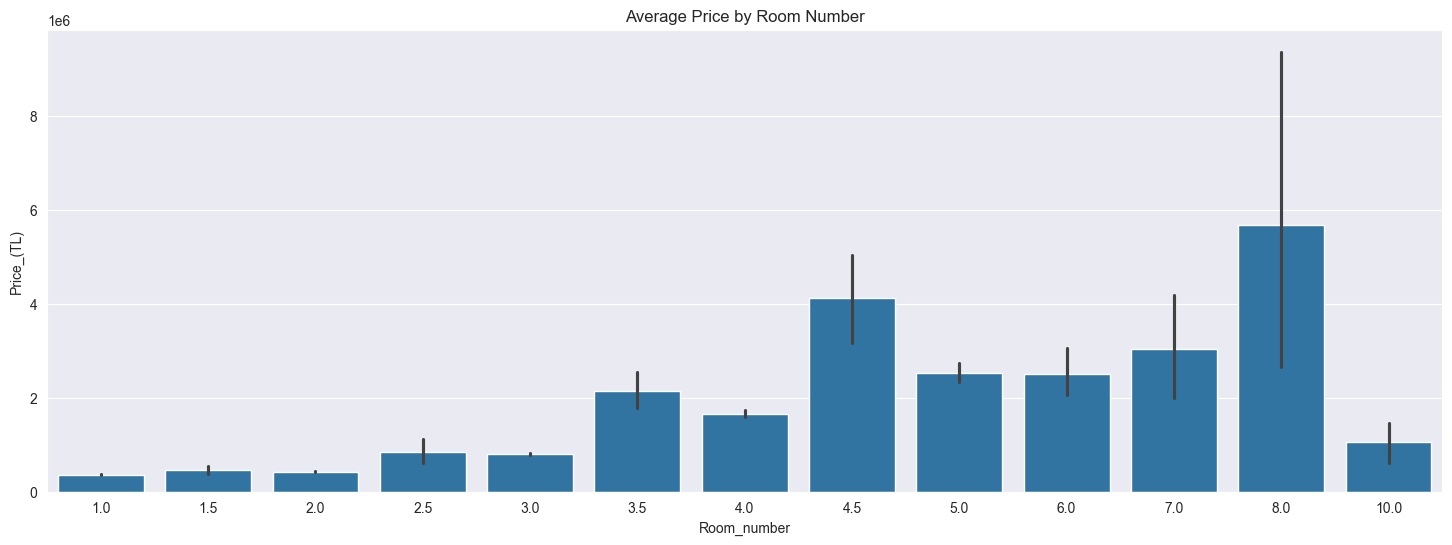

In [159]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Room_number",
    y="Price_(TL)",
    estimator="mean"
)
plt.title("Average Price by Room Number")
plt.show()

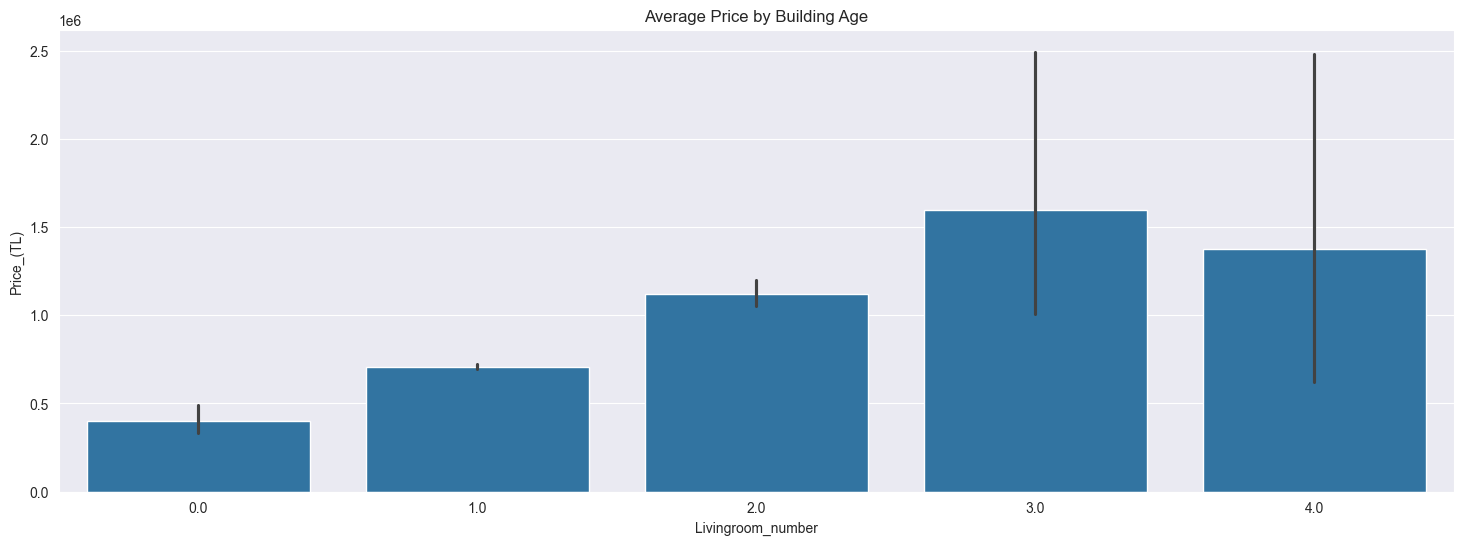

In [160]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Livingroom_number",
    y="Price_(TL)",
    estimator="mean"
)
plt.title("Average Price by Building Age")
plt.show()

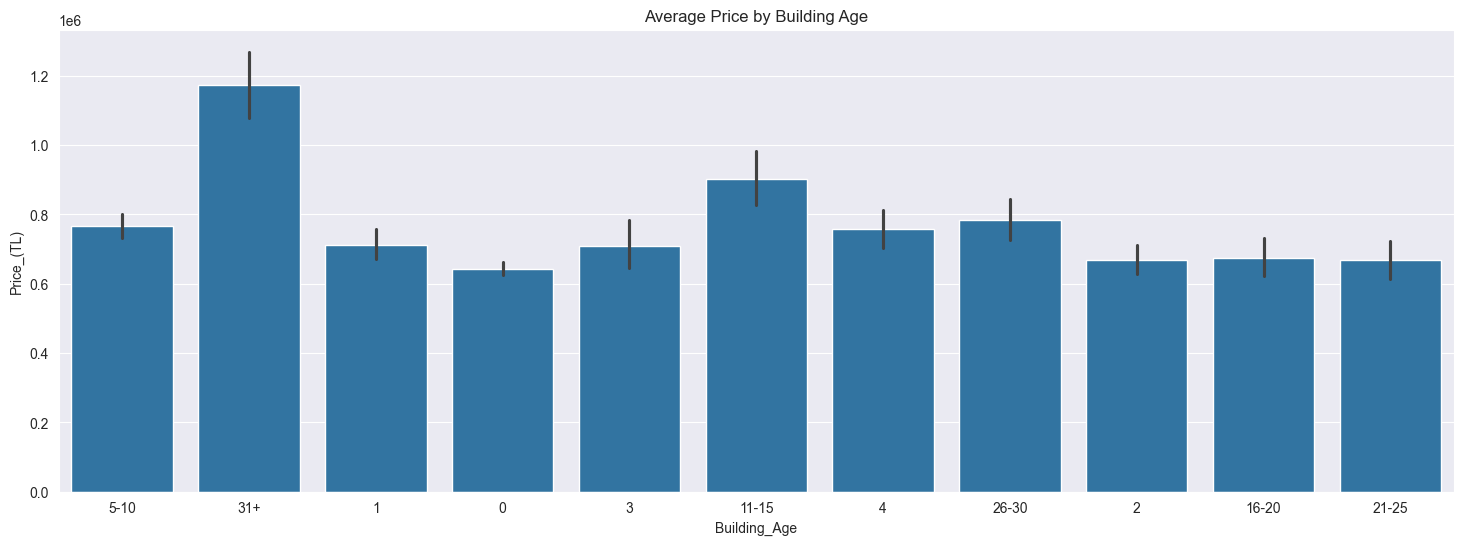

In [161]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Building_Age",
    y="Price_(TL)",
    estimator="mean"
)
plt.title("Average Price by Building Age")
plt.show()

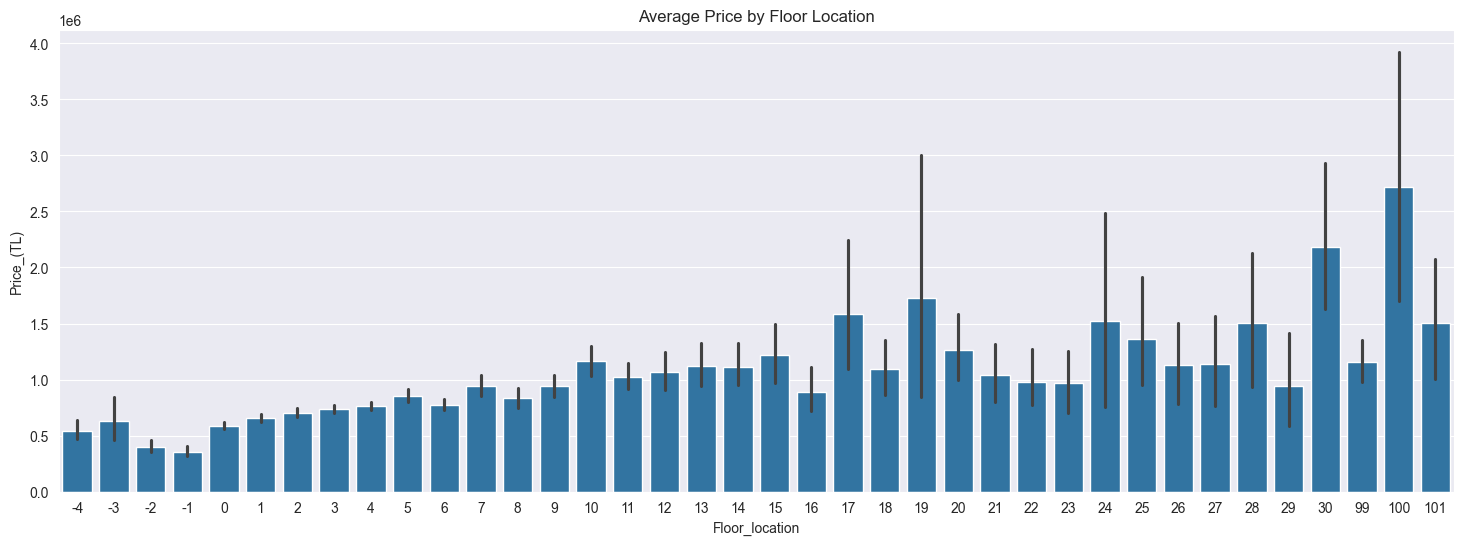

In [162]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Floor_location",
    y="Price_(TL)",
    estimator="mean"
)
plt.title("Average Price by Floor Location")
plt.show()

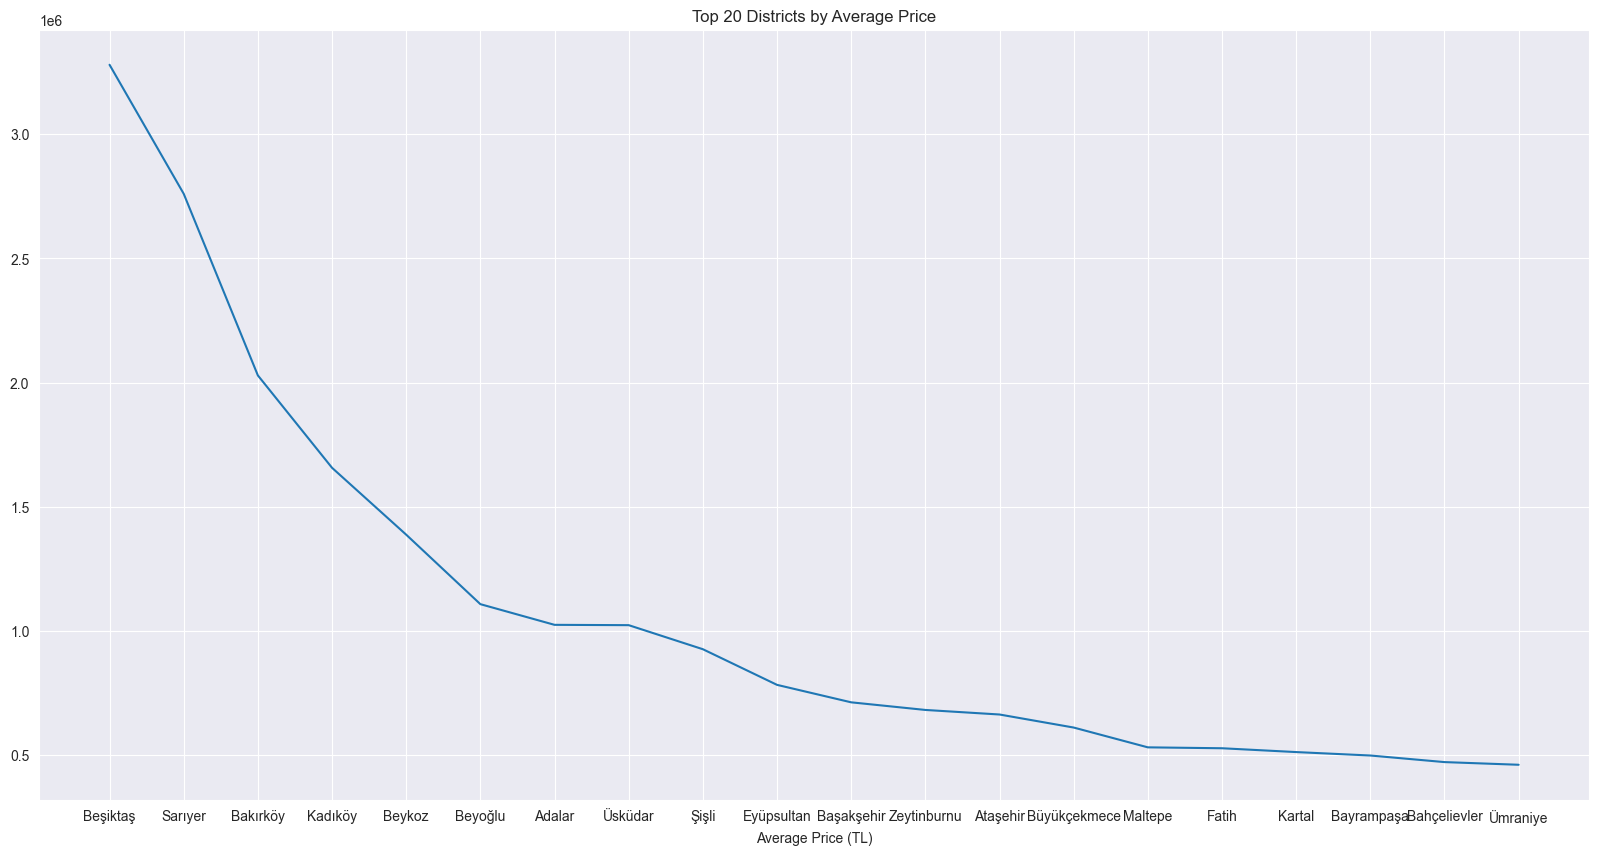

In [163]:
plt.figure(figsize=(20,10))
top20 = data.groupby("District")["Price_(TL)"].mean().sort_values(ascending=False).head(20)
sns.lineplot(x=top20.index, y=top20.values)
plt.title("Top 20 Districts by Average Price")
plt.xlabel("Average Price (TL)")
plt.show()

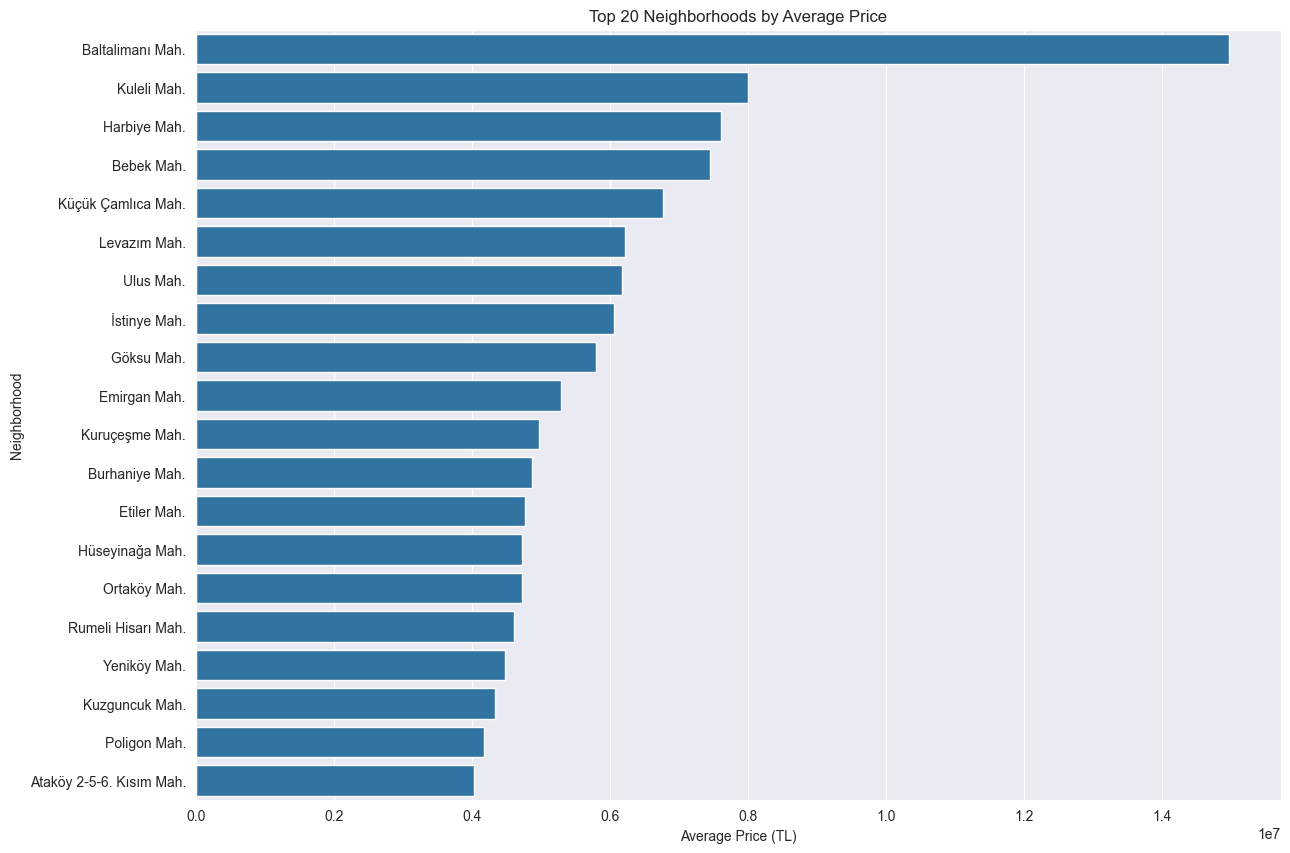

In [164]:
plt.figure(figsize=(14,10))
top20 = data.groupby("Neighborhood")["Price_(TL)"].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top20.values, y=top20.index)
plt.title("Top 20 Neighborhoods by Average Price")
plt.xlabel("Average Price (TL)")
plt.show()

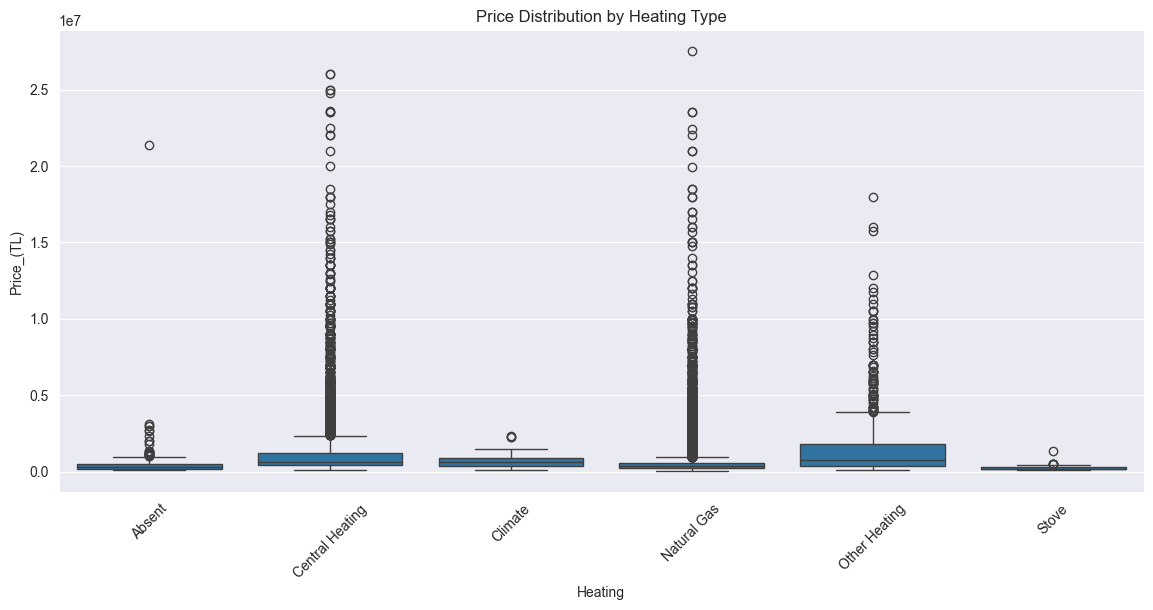

In [165]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x="Heating", y="Price_(TL)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Heating Type")
plt.show()

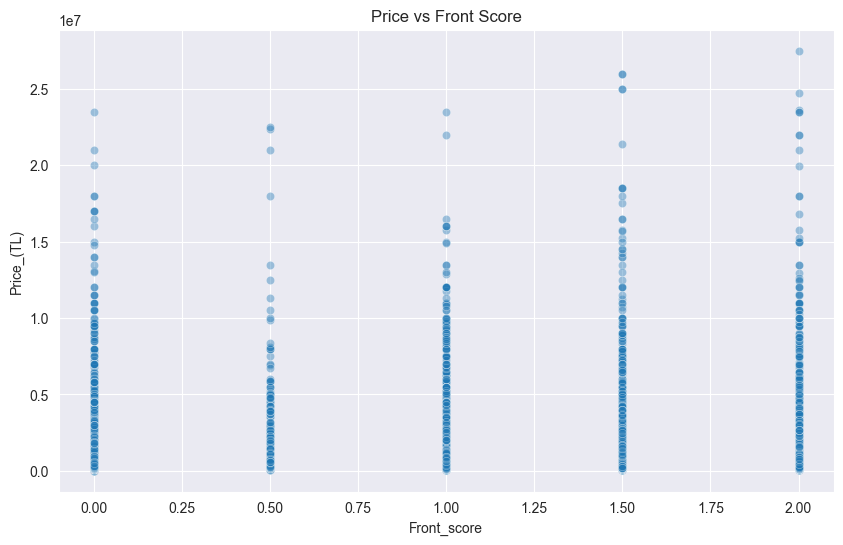

In [166]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="Front_score",
    y="Price_(TL)",
    alpha=0.4
)
plt.title("Price vs Front Score")
plt.show()


Price_(TL)    616
dtype: int64


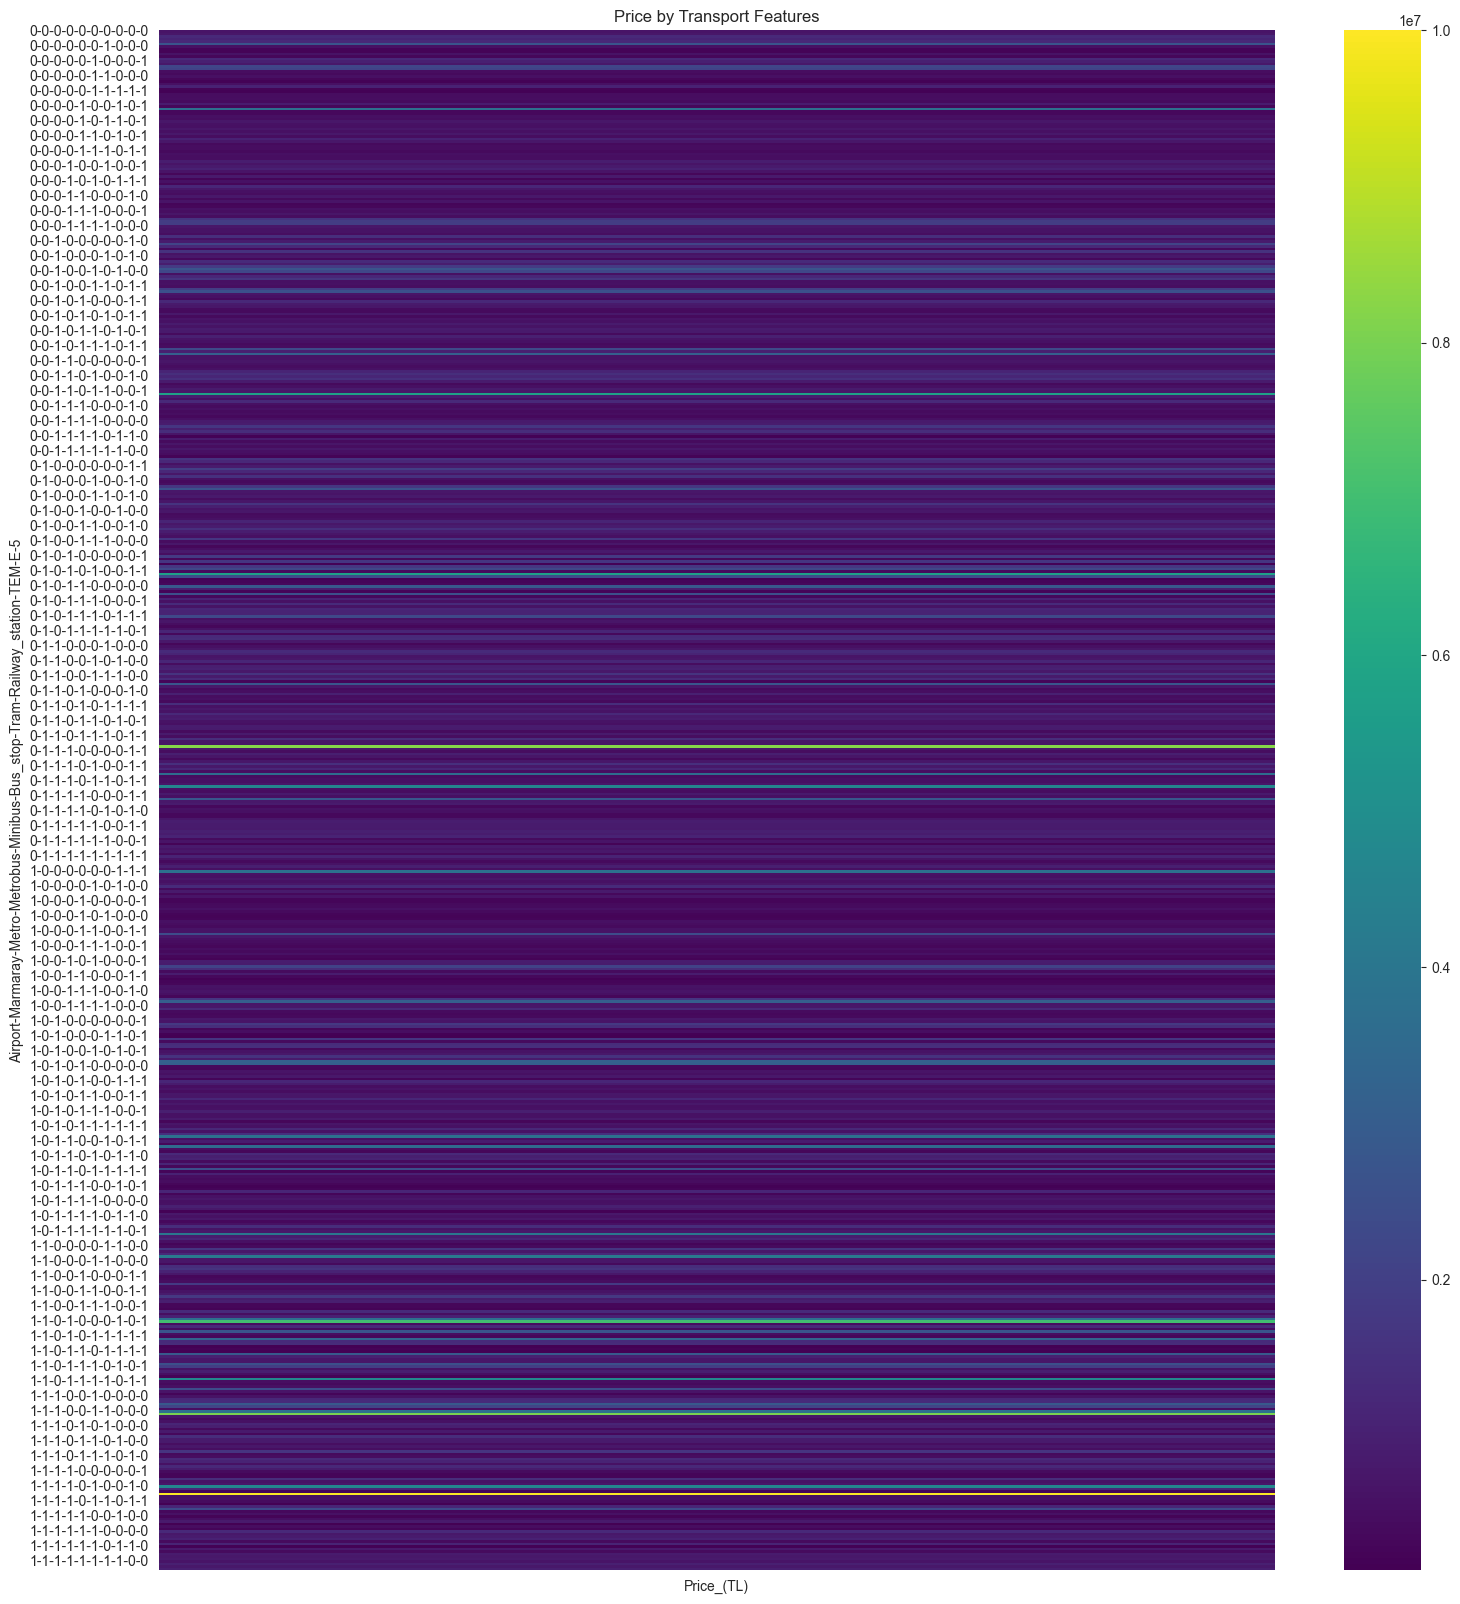

In [167]:
transport_cols = ["Airport","Marmaray","Metro","Metrobus","Minibus","Bus_stop","Tram","Railway_station","TEM","E-5"]

transport_means = data[transport_cols + ["Price_(TL)"]].groupby([col for col in transport_cols]).mean()
print(transport_means.count())
plt.figure(figsize=(18,20))
sns.heatmap(transport_means, annot=False, cmap="viridis")
plt.title("Price by Transport Features")
plt.show()


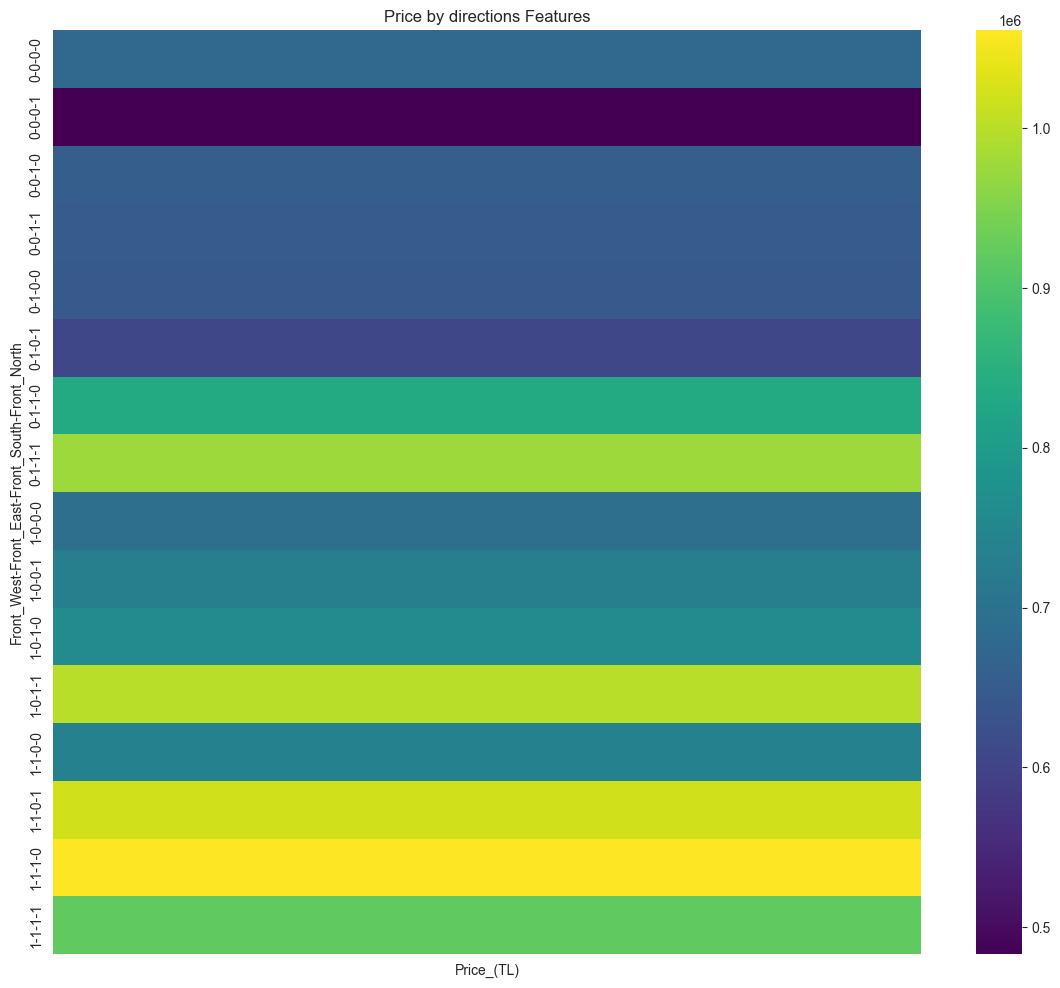

In [168]:
directions_cols = ['Front_West', 'Front_East', 'Front_South', 'Front_North']

directions_means = data[directions_cols + ["Price_(TL)"]].groupby([col for col in directions_cols]).mean()

plt.figure(figsize=(14,12))
sns.heatmap(directions_means, annot=False, cmap="viridis")
plt.title("Price by directions Features")
plt.show()

In [169]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=data,
    x="m2_(Gross)",
    y="m2_(Net)",
    z="Price_(TL)",
    color="Number_of_rooms",
    opacity=0.6
)
fig.show()


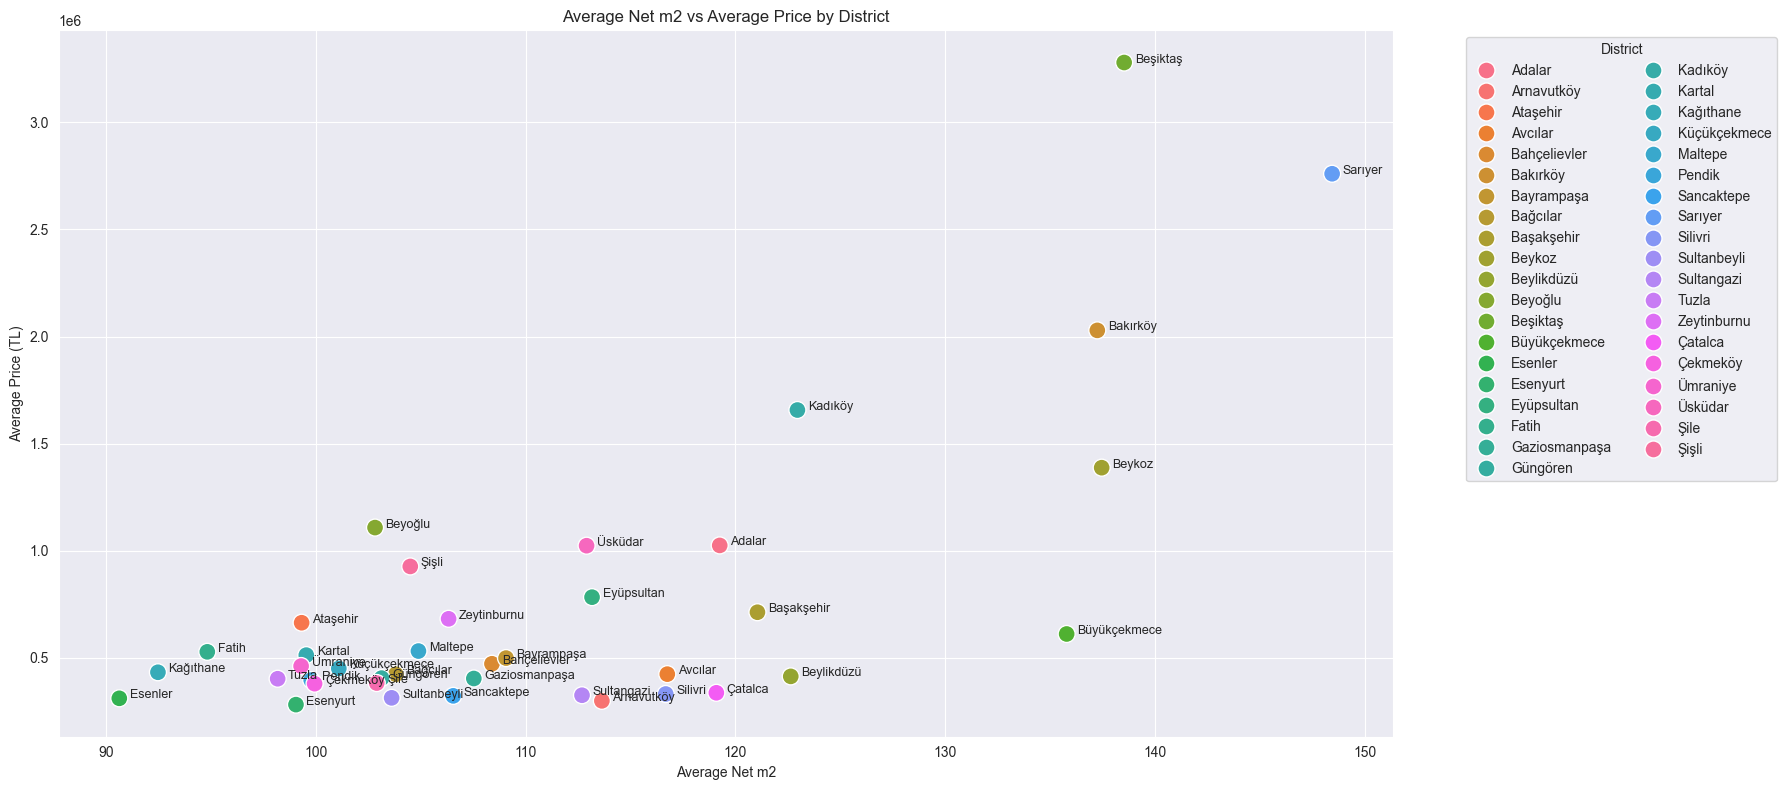

In [170]:
df_grouped = data.groupby("District").agg({
    "m2_(Net)": "mean",
    "Price_(TL)": "mean"
}).reset_index()

plt.figure(figsize=(18, 8))
ax = sns.scatterplot(
    x=df_grouped["m2_(Net)"],
    y=df_grouped["Price_(TL)"],
    hue=df_grouped["District"],
    s=150
)

# Add the district name as a label next to each data point
for i in range(len(df_grouped)):
    ax.text(
        df_grouped["m2_(Net)"].iloc[i] + 0.5,
        df_grouped["Price_(TL)"].iloc[i] + 0.5,
        df_grouped["District"].iloc[i],
        fontsize=9
    )

plt.xlabel("Average Net m2")
plt.ylabel("Average Price (TL)")
plt.title("Average Net m2 vs Average Price by District")

plt.legend(title="District", bbox_to_anchor=(1.05, 1), ncol=2, frameon=True)
plt.tight_layout()
plt.show()


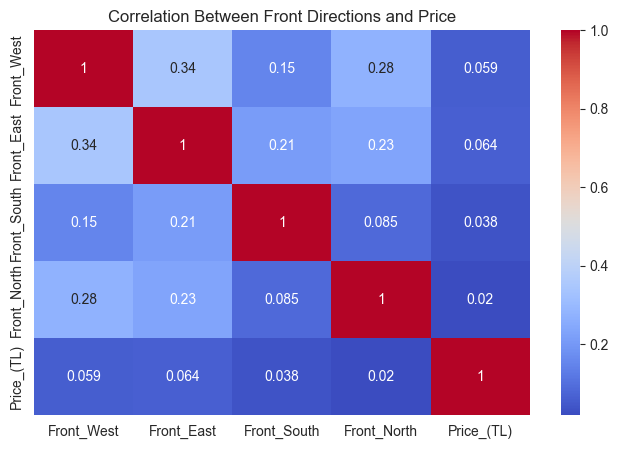

In [171]:
front_cols = ["Front_West", "Front_East", "Front_South", "Front_North", "Price_(TL)"]

plt.figure(figsize=(8, 5))
sns.heatmap(
    data[front_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Front Directions and Price")
plt.show()


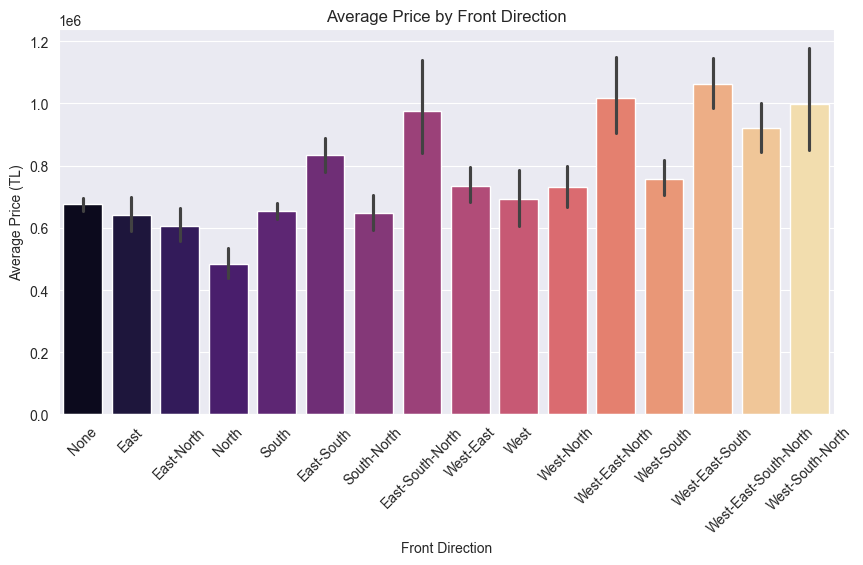

In [172]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="Front_combined",
    y="Price_(TL)",
    hue="Front_combined",
    estimator="mean",
    palette="magma",
    dodge=False,
    legend=False
)
plt.title("Average Price by Front Direction")
plt.xlabel("Front Direction")
plt.ylabel("Average Price (TL)")
plt.xticks(rotation=45)
plt.show()


# Model

In [ ]:
columns = [
    "District",
    "Neighborhood",
    "Price_(TL)",
    "m2_(Net)",
    "Livingroom_number",
    "Room_number",
    "Building_Age",
    "Floor_location",
    "Number_of_floors",
    "Heating",
    "Number_of_bathrooms",
    "Available_for_Loan",
    "From_who",
    "Front_West",
    "Front_East",
    "Front_South",
    "Front_North",
    "Internet",
    "Security_Alarm",
    "Smart_House",
    "Elevator",
    "Balcony",
    "Car_Park",
    "Laminate_Floor",
    "Luxury_Facilities",
    "Airport",
    "Marmaray",
    "Metro",
    "Metrobus",
    "Minibus",
    "Bus_stop",
    "Tram",
    "Railway_station",
    "TEM",
    "E-5"
]

In [ ]:
data_model = data[columns].copy()

data_model ["m2_(Net)"] = np.log1p(data_model ["m2_(Net)"])

X = data_model.drop("Price_(TL)", axis=1)
#y = data_model["Price (TL)"]
y = np.log1p(data_model["Price_(TL)"])

In [ ]:
print(
    data.loc[12695]
)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=15)

In [ ]:
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

In [ ]:
categorical_cols

In [ ]:
catboost_cols = ["District", "Neighborhood", "Building_Age"]
#ordinal_cols = ["Number of rooms", "Building Age"]
#ordinal_cols = ["Floor_location"]
onehot_cols = ["Heating", "Available_for_Loan", "From_who"]

numeric_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

In [ ]:
number_of_rooms_order = ["Studio (1+0)", "1+1", "1.5+1", "2+0", "2+1", "2+2", "2.5+1", "3+1", "3+2", "3.5+1",
                         "4+1", "4.5+1", "4+2", "4+3", "4+4", "5+1", "5+2", "5+3", "5+4", "6+1", "6+2", "6+3",
                         "7+1", "7+2", "7+3", "8+1", "8+2", "8+3", "8+4", "9+2", "10+", "10+1"]

building_age_order = ["0", "1", "2", "3", "4", "5-10", "11-15", "16-20", "21-25", "26-30", "31+"]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import CatBoostEncoder

# ("ordinal", OrdinalEncoder(categories=[number_of_rooms_order, building_age_order]), ordinal_cols),
# ("ordinal", OrdinalEncoder(), ordinal_cols),
preprocessor = ColumnTransformer(
    transformers=[
        ("catboost", CatBoostEncoder(), catboost_cols),
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols)
    ],
    remainder="passthrough"
)

In [ ]:
# X_train_encoded = preprocessor.fit_transform(X_train)
# TypeError: fit_transform() missing argument: y
# Since CatBoostEncoder is a supervised encoder, we give the y value to the fit_transform method.

X_train_encoded = preprocessor.fit_transform(X_train, y_train)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_test = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out(), index=X_test.index)

In [ ]:
#X_train

In [ ]:
#X_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def calculate_regression_metrics(true_log, predicted_log):
    true = np.expm1(true_log)
    predicted = np.expm1(predicted_log)

    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, rmse, mae, r2

In [ ]:
tree_models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),

    "Extra Trees": ExtraTreesRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

In [ ]:
for i in range(len(list(tree_models))):
    model = list(tree_models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    modeltree_train_mse, modeltree_train_rmse, modeltree_train_mae, modeltree_train_r2 = calculate_regression_metrics(y_train, y_train_pred)
    modeltree_test_mse, modeltree_test_rmse, modeltree_test_mae, modeltree_test_r2 = calculate_regression_metrics(y_test, y_test_pred)

    print(list(tree_models.values())[i])

    print("Evaluation for Training Set")
    print("MSE :", modeltree_train_mse)
    print("RMSE :", modeltree_train_rmse)
    print("MAE :", modeltree_train_mae)
    print("R2 Score :", modeltree_train_r2)

    print("------------------------")

    print("Evaluation for Test Set")
    print("MSE :", modeltree_test_mse)
    print("RMSE :", modeltree_test_rmse)
    print("MAE :", modeltree_test_mae)
    print("R2 Score :", modeltree_test_r2)

    print("------------------------")
    print("\n")

In [ ]:
sns.boxplot(y="Price_(TL)", data=data)

In [ ]:
sns.boxplot(y="m2_(Gross)", data=data)

In [ ]:
sns.boxplot(y="m2_(Net)", data=data)

In [ ]:
import numpy as np

plt.figure(figsize=(10,6))
sns.histplot(np.log1p(data["Price_(TL)"]), bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data["m2_(Net)"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
"""
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt","log2"],
}

gb_params = {
    "n_estimators": [300, 500, 800],
    "learning_rate": [0.03, 0.05, 0.07],
    "max_depth": [7, 9, 11],
    "subsample": [0.6, 0.7, 0.8],
}

xgb_params = {
    "max_depth": [4, 6, 8, 10, 12],
    "learning_rate": [0.01, 0.02, 0.05, 0.07, 0.1],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 1],
    "reg_lambda": [0, 0.5, 1, 1.5, 2],
    "min_child_weight": [1, 3, 5, 7, 10, 15, 20],
    "gamma": [0, 0.5, 1, 2, 3, 5]
}

lgbm_params = {
    "num_leaves": [30, 50, 70, 90, 110, 130, 150],
    "max_depth": [6, 8, 10, 12, 14, 15],
    "learning_rate": [0.005, 0.01, 0.02, 0.03, 0.05],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 1],
    "reg_lambda": [0, 0.2, 0.5, 0.7, 1],
    "min_child_samples": [10, 20, 50, 100, 150, 200]
}

cat_params = {
    "iterations": [600, 800, 1000, 2000, 3000],
    "learning_rate": [0.01, 0.03, 0.05],
    "depth": [6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7],
    "border_count": [32, 64, 128]
}"""

cat_params = {
    "iterations": [2000, 3000],
    "learning_rate": [0.03, 0.05],
    "depth": [7, 8],
    "l2_leaf_reg": [9, 12, 15],
    "border_count": [254],
    "bagging_temperature": [0, 1]
}




In [ ]:
rscv_treemodels = [
    #("Random Forest", RandomForestRegressor(), rf_params),
    #("Gradient Boosting", GradientBoostingRegressor(), gb_params),
    #("XGBoost", XGBRegressor(), xgb_params),
    #("LGBM", LGBMRegressor(), lgbm_params),
    ("Cat", CatBoostRegressor(), cat_params),
]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for name, model, params in rscv_treemodels:
    randomcv_treemodels = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=30, cv=kf, verbose=2, n_jobs=-1, scoring="r2")
    randomcv_treemodels.fit(X_train, y_train)
    print("Best params for: ", name, randomcv_treemodels.best_params_)

In [ ]:
"""
treemodels_hyper = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        min_samples_split=5,
        min_samples_leaf= 1,
        max_features="sqrt",
        max_depth=20
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        subsample=0.7,
        n_estimators=1600, #200
        max_depth=7,
        learning_rate=0.03
    ),

    "XGBoost": XGBRegressor(
         subsample= 1.0,
         reg_lambda= 0,
         reg_alpha= 0.1,
         min_child_weight= 20,
         max_depth= 10,
         learning_rate= 0.07,
         gamma= 0,
         colsample_bytree= 0.6
    ),

    "LGBM": LGBMRegressor(
        subsample=0.7,
        reg_lambda=0,
        reg_alpha=0.1,
        num_leaves=90,
        min_child_samples=150,
        max_depth=14,
        learning_rate=0.05,
        colsample_bytree=0.8
    ),

    "Cat": CatBoostRegressor(
         learning_rate = 0.05,
         l2_leaf_reg = 3,
         iterations = 2000,
         depth = 8,
         border_count = 128,
    )
}
"""

treemodels_hyper = {
    "Cat": CatBoostRegressor(
         learning_rate = 0.05,
         l2_leaf_reg = 9,
         iterations = 3000,
         depth = 8,
         border_count = 254,
         bagging_temperature=1
    )
}

In [ ]:
for i in range(len(list(treemodels_hyper))):
    model = list(treemodels_hyper.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    modeltree_train_mse, modeltree_train_rmse, modeltree_train_mae, modeltree_train_r2 = calculate_regression_metrics(y_train, y_train_pred)
    modeltree_test_mse, modeltree_test_rmse, modeltree_test_mae, modeltree_test_r2 = calculate_regression_metrics(y_test, y_test_pred)

    print(list(treemodels_hyper.values())[i])

    print("Evaluation for Training Set")
    print("MSE :", modeltree_train_mse)
    print("RMSE :", modeltree_train_rmse)
    print("MAE :", modeltree_train_mae)
    print("R2 Score :", modeltree_train_r2)

    print("------------------------")

    print("Evaluation for Test Set")
    print("MSE :", modeltree_test_mse)
    print("RMSE :", modeltree_test_rmse)
    print("MAE :", modeltree_test_mae)
    print("R2 Score :", modeltree_test_r2)

    print("------------------------")
    print("\n")